## Import

In [218]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [219]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from matplotlib import rcParams
rcParams['figure.figsize'] = 12,8

## Data loading

In [220]:
train_data = pd.read_csv('train.csv')

In [221]:
test_data = pd.read_csv('test.csv')

In [222]:
train_data.shape

(1460, 81)

In [223]:
test_data.shape

(1459, 80)

In [224]:
train_data.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       2003.0          RFn           2         548         TA   
1     Attchd       1976.0          RFn           2         460         TA   
2     Attchd       2001.0          RFn           2         608         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   
2         TA          Y           0           42              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0    NaN   NaN         NaN        0       2    2008   
1            0         0    NaN   NaN         NaN        0       5    2007   
2            0         0    NaN   NaN         NaN        0       9    2008   

  SaleType SaleCondition  SalePrice  
0       WD        Normal     208500  
1       WD        Normal     181500  
2       WD        Normal     223500

In [225]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [226]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [227]:
train_data.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

In [228]:
combine = [train_data, test_data]

## Analysis

In [229]:
def pie_box(col, title):
    labels = train_data[col].value_counts().index.tolist()
    fracs = train_data[col].value_counts().values
    plt.pie(fracs, labels=labels, autopct='%1.1f%%')
    plt.title(title)
    plt.show()
    
    sns.boxplot(data=train_data, y='SalePrice' , x=col)
    plt.show()

In [230]:
def hist_scatter(col, title):
    sns.histplot(train_data[col], bins=60)
    plt.title(title)
    plt.show()
    
    plt.scatter(train_data[col], train_data['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()

### Target Feature - SalePrice

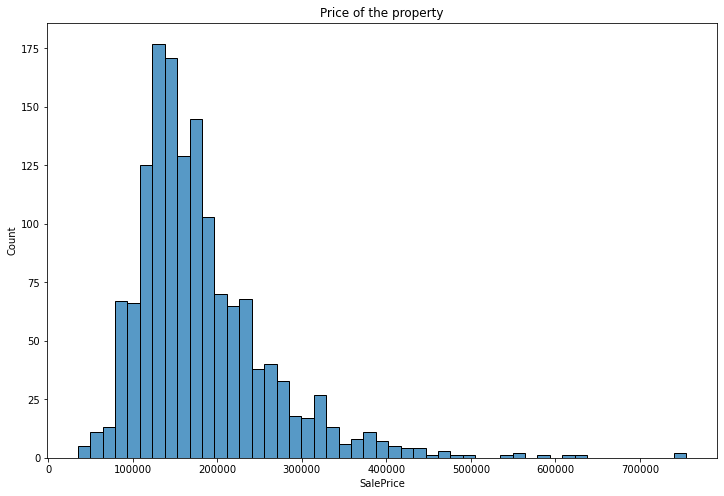

In [231]:
sns.histplot(train_data['SalePrice'])
plt.title('Price of the property')
plt.show()

### MSSubClass

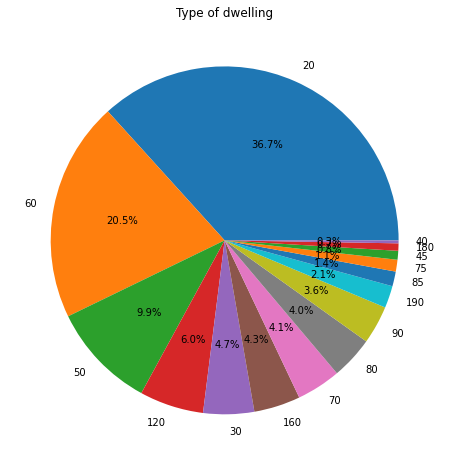

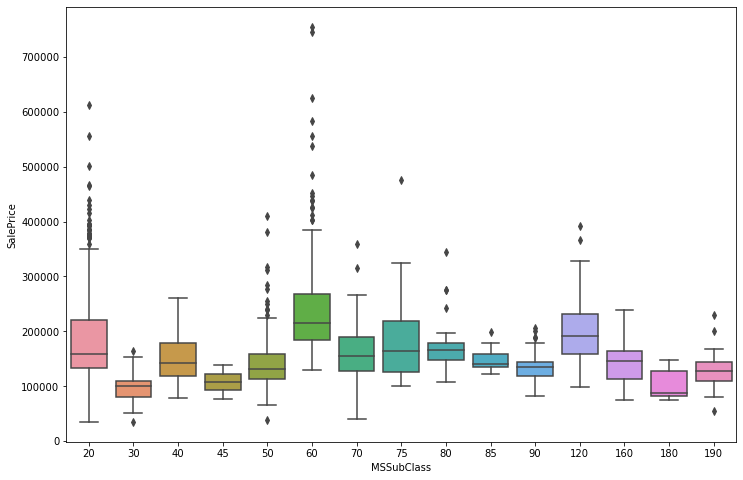

In [232]:
pie_box('MSSubClass', 'Type of dwelling')

Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

Most of the dwellings are 1-STORY 1946 & NEWER ALL STYLES and 2-STORY 1946 & NEWER. Also this feature copied info from two other features - HouseStyle which contains number of stories and YearBuilt which contains the year of construction. There is no missing values in this features, so feature MSSubClass can be deleted.

### MSZoning

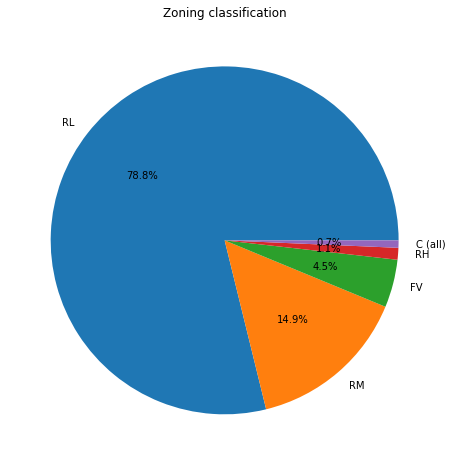

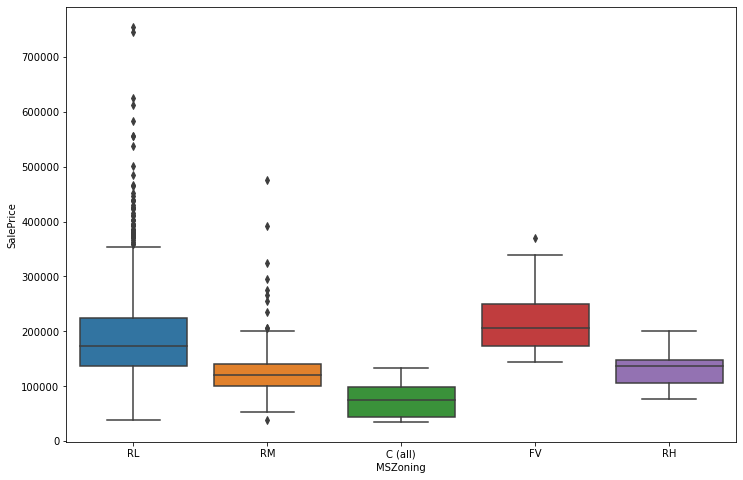

In [233]:
pie_box('MSZoning', 'Zoning classification')

More that three quartes of houses located in Residential Low Density zones, and 15% in Residential Medium Density zones. We can fill in missing values by mode.

In [234]:
for dataset in combine:
    dataset['MSZoning'] = dataset['MSZoning'].fillna(train_data['MSZoning'].mode()[0])

### LotFrontage

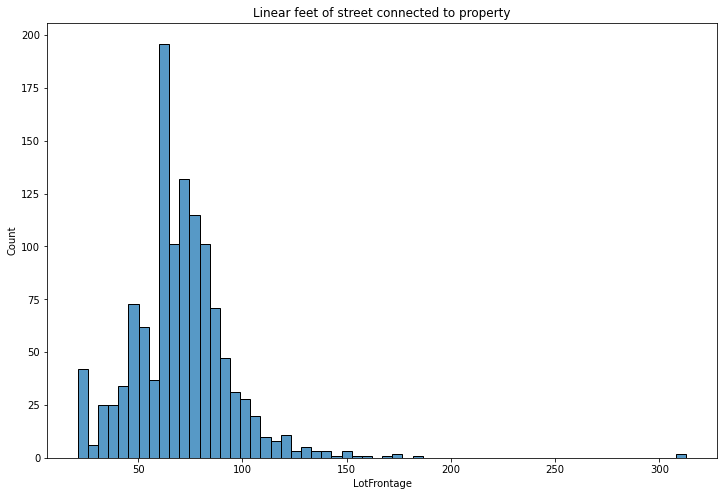

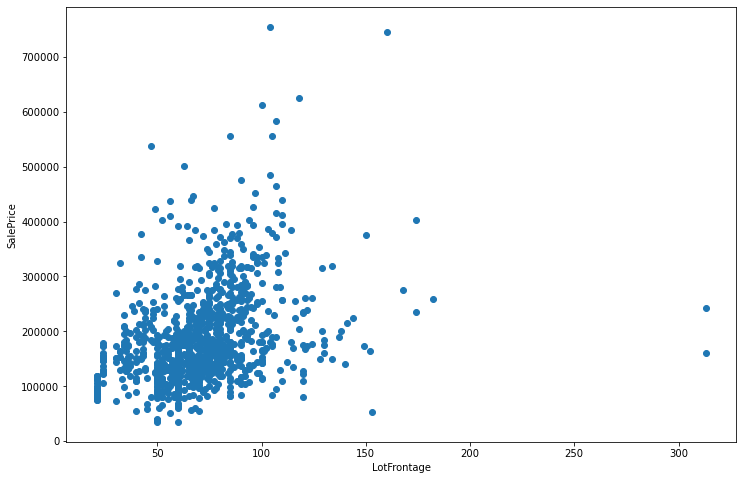

In [235]:
hist_scatter('LotFrontage', 'Linear feet of street connected to property')

In [236]:
train_data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

LotFrontage plot has almost normal distribution with some outlier near 300 feet and peak at around 60. Apparently there are some rounded values. LotFrontage correlates with LotArea and 1stFlrSF, so we can use this features to fill in the gaps.

In [237]:
lr = LinearRegression()
lr.fit(train_data.dropna(subset=['LotFrontage'])[['LotArea', '1stFlrSF']], train_data['LotFrontage'].dropna())

LinearRegression()

In [238]:
for dataset in combine:
    LF_pred = pd.Series(lr.predict(dataset[['LotArea', '1stFlrSF']]))
    dataset['LotFrontage'] = dataset['LotFrontage'].fillna(LF_pred)

In [239]:
outliers_ind = []

In [240]:
train_data.query('LotFrontage > 300 ')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
934    935          20       RL        313.0    27650   Pave   NaN      IR2   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
934          HLS    AllPub    Inside       Mod        NAmes       PosA   
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
934        Norm     1Fam     1Story            7            7       1960   
1298       Norm     1Fam     2Story           10            5       2008   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
934           2007      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
934          0.0        TA        TA     CBlock       Gd       TA   
1298       796.0        Ex        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
934            Gd          GLQ         425          Unf           0   
1298           Gd          GLQ        5644          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
934         160          585    GasA        Ex          Y      SBrkr   
1298        466         6110    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
934       2069         0             0       2069             1             0   
1298      4692       950             0       5642             2             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
934          2         0             4             1          Gd   
1298         2         1             3             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
934              9        Typ           1          Gd     Attchd       1960.0   
1298            12        Typ           3          Gd     Attchd       2008.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
934           RFn           2         505         TA         TA          Y   
1298          Fin           2        1418         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
934            0            0              0          0            0   
1298         214          292              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
934          0    NaN   NaN         NaN        0      11    2008       WD   
1298       480     Gd   NaN         NaN        0       1    2008      New   

     SaleCondition  SalePrice  
934         Normal     242000  
1298       Partial     160000

In [241]:
outliers_ind.extend(train_data.query('LotFrontage > 300 ').index.to_list())

### LotArea

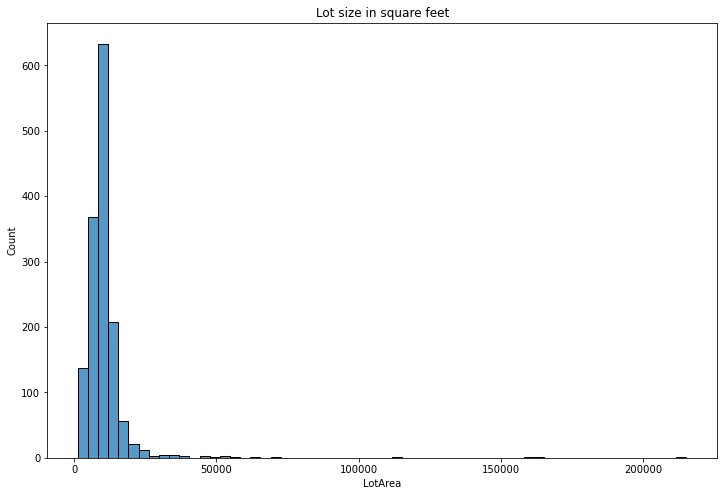

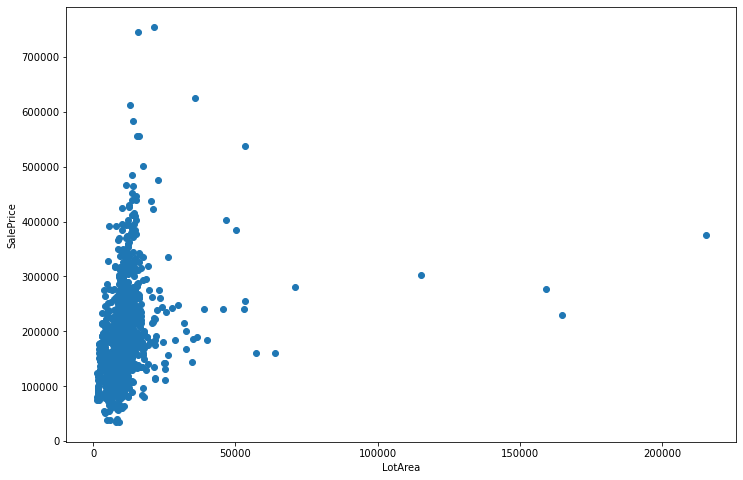

In [242]:
hist_scatter('LotArea', 'Lot size in square feet')

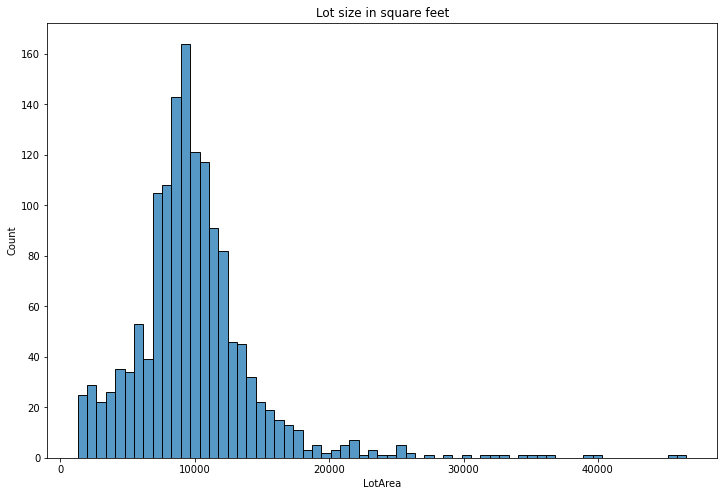

In [243]:
sns.histplot(train_data.query('LotArea < 50000 ')['LotArea'])
plt.title('Lot size in square feet')
plt.show()

In [244]:
train_data['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

Feature has some outliers.

In [245]:
train_data.query('LotArea > 100000')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
249  250          50       RL   216.282054   159000   Pave   NaN      IR2   
313  314          20       RL   150.000000   215245   Pave   NaN      IR3   
335  336         190       RL   225.481454   164660   Grvl   NaN      IR1   
706  707          20       RL   183.566596   115149   Pave   NaN      IR2   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
249         Low    AllPub   CulDSac       Sev      ClearCr       Norm   
313         Low    AllPub    Inside       Sev       Timber       Norm   
335         HLS    AllPub    Corner       Sev       Timber       Norm   
706         Low    AllPub   CulDSac       Sev      ClearCr       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
249       Norm     1Fam     1.5Fin            6            7       1958   
313       Norm     1Fam     1Story            7            5       1965   
335       Norm   2fmCon     1.5Fin            5            6       1965   
706       Norm     1Fam     1Story            7            5       1971   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
249          2006     Gable  CompShg     Wd Sdng     HdBoard     BrkCmn   
313          1965       Hip  CompShg     BrkFace     BrkFace       None   
335          1965     Gable  CompShg     Plywood     Plywood       None   
706          2002     Gable  CompShg     Plywood     Plywood      Stone   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
249       472.0        Gd        TA     CBlock       Gd       TA           Gd   
313         0.0        TA        TA     CBlock       Gd       TA           Gd   
335         0.0        TA        TA     CBlock       TA       TA           Gd   
706       351.0        TA        TA     CBlock       Gd       TA           Gd   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
249          Rec         697          Unf           0        747         1444   
313          ALQ        1236          Rec         820         80         2136   
335          ALQ        1249          BLQ         147        103         1499   
706          GLQ        1219          Unf           0        424         1643   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
249    GasA        Gd          Y      SBrkr      1444       700             0   
313    GasW        TA          Y      SBrkr      2036         0             0   
335    GasA        Ex          Y      SBrkr      1619       167             0   
706    GasA        TA          Y      SBrkr      1824         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
249       2144             0             1         2         0             4   
313       2036             2             0         2         0             3   
335       1786             2             0         2         0             3   
706       1824             1             0         2         0             2   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
249             1          Gd             7        Typ           2   
313             1          TA             8        Typ           2   
335             1          TA             7        Typ           2   
706             1          Gd             5        Typ           2   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
249          TA     Attchd       1958.0          Fin           2         389   
313          Gd     Attchd       1965.0          RFn           2         513   
335          Gd     Attchd       1965.0          Fin           2         529   
706          TA     Attchd       1971.0          Unf           2         739   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
249         TA         TA          Y           0   

In [246]:
outliers_ind.extend(train_data.query('LotArea > 100000').index.to_list())

### Street

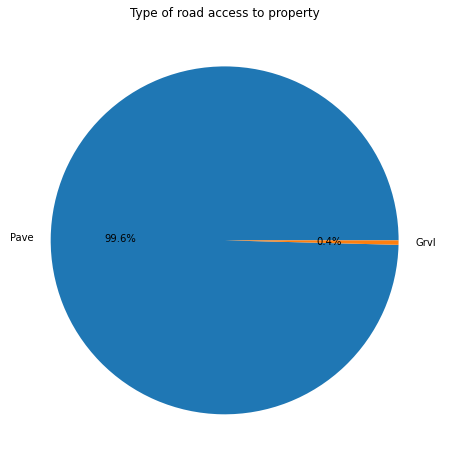

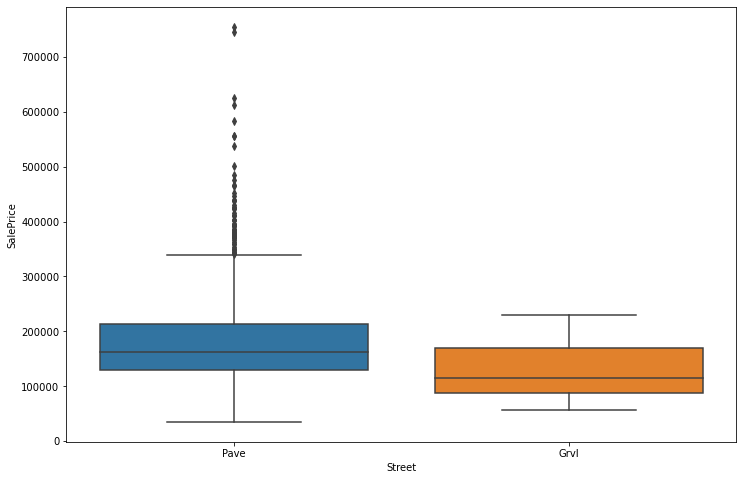

In [247]:
pie_box('Street', 'Type of road access to property')

In [248]:
train_data['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

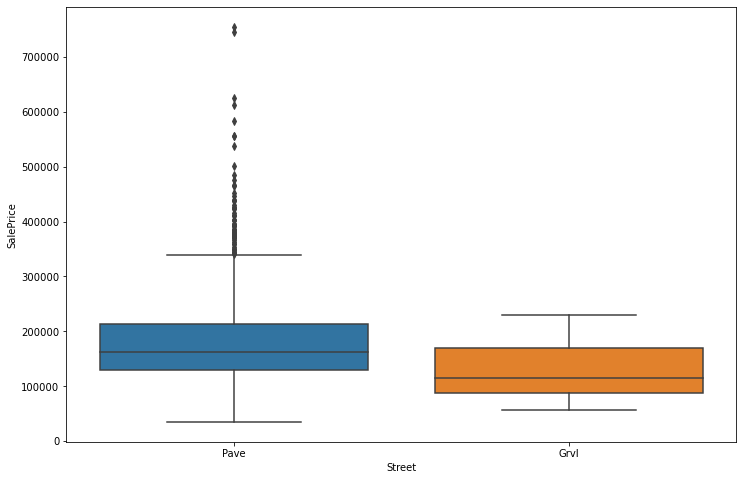

In [249]:
sns.boxplot(data=train_data, y='SalePrice' , x='Street')

Almost all of roads are paved. This feature might be useless.

### Alley

In [250]:
train_data['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

Alley feature has a lot of missing data, but by the data description we can suppose that it means that there is no alley access. We can fill in the gaps by 'NA'

In [251]:
for dataset in combine:
    dataset['Alley'] = dataset['Alley'].fillna('NA')

<AxesSubplot:xlabel='Alley', ylabel='SalePrice'>

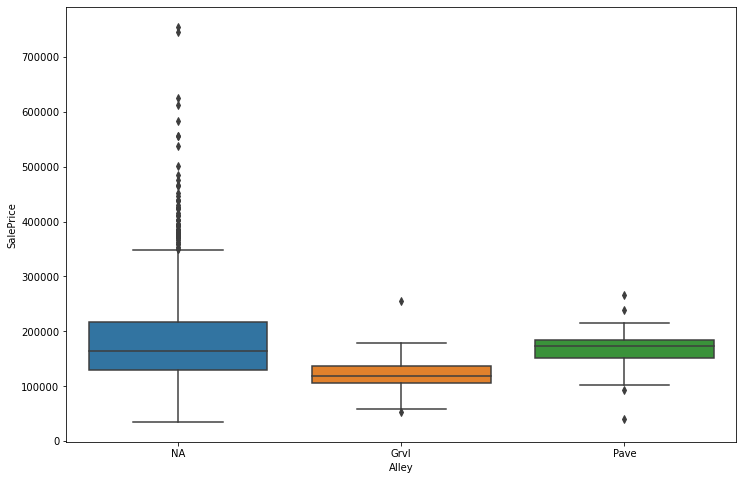

In [252]:
sns.boxplot(data=train_data, y='SalePrice' , x='Alley')

### LotShape

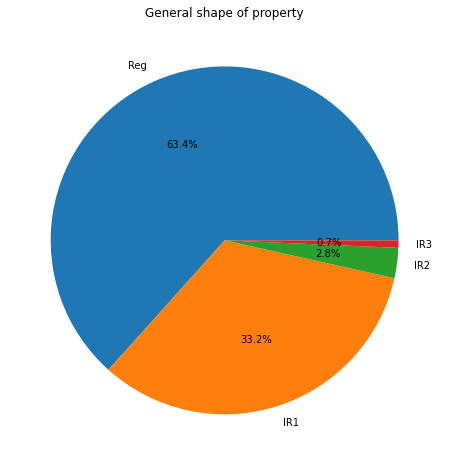

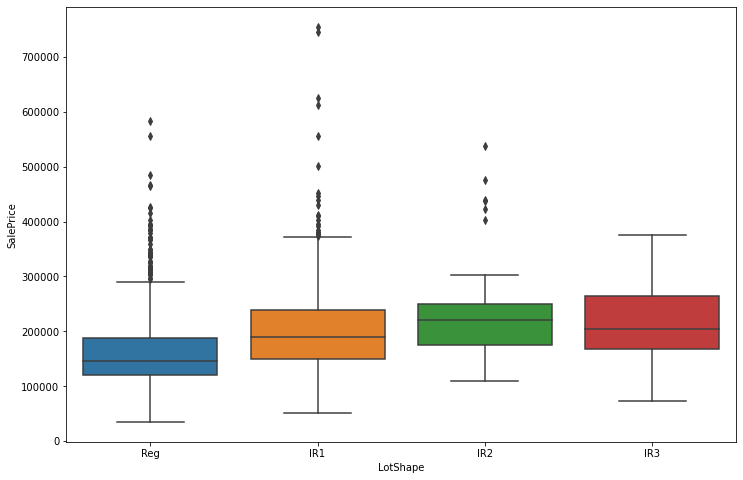

In [253]:
pie_box('LotShape', 'General shape of property')

<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

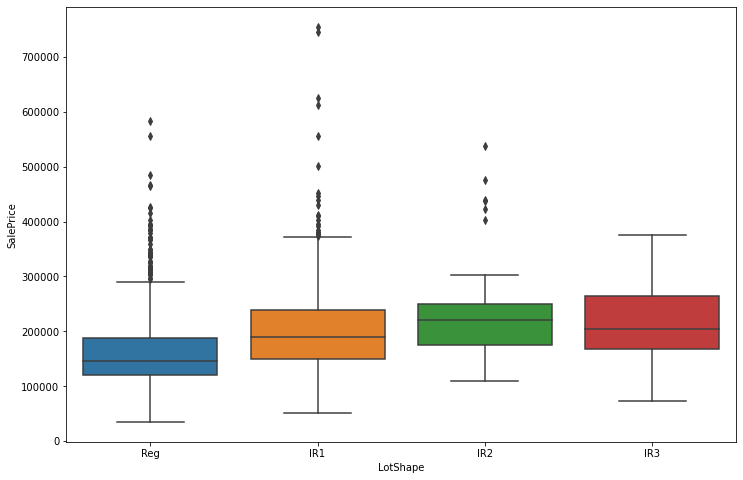

In [254]:
sns.boxplot(data=train_data, y='SalePrice' , x='LotShape')

More than half of properties have regular form.

### LandContour 

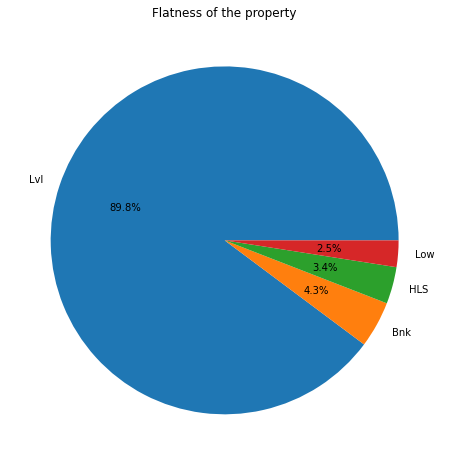

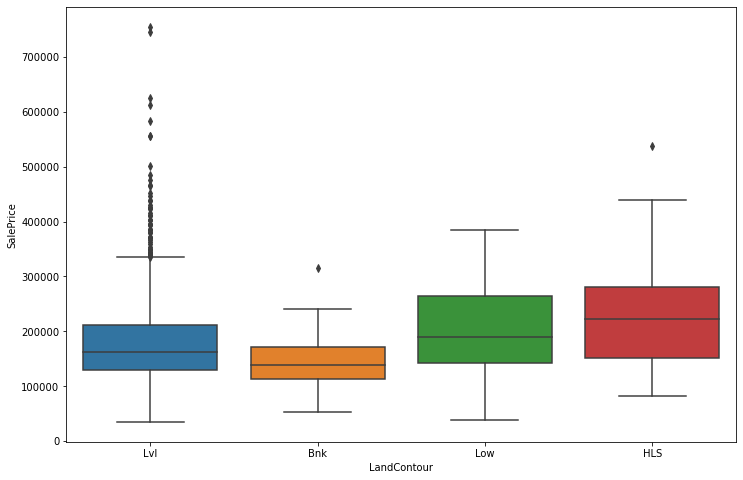

In [255]:
pie_box('LandContour', 'Flatness of the property')

Most of the property is flat.

### Utilities

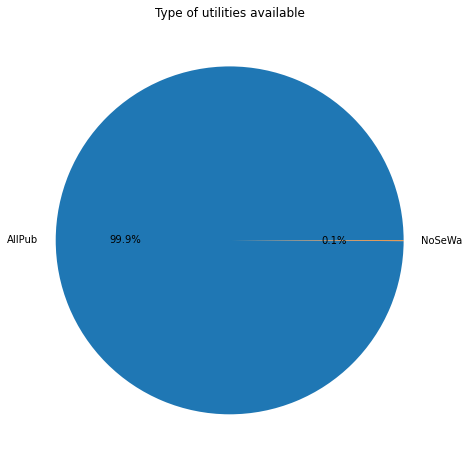

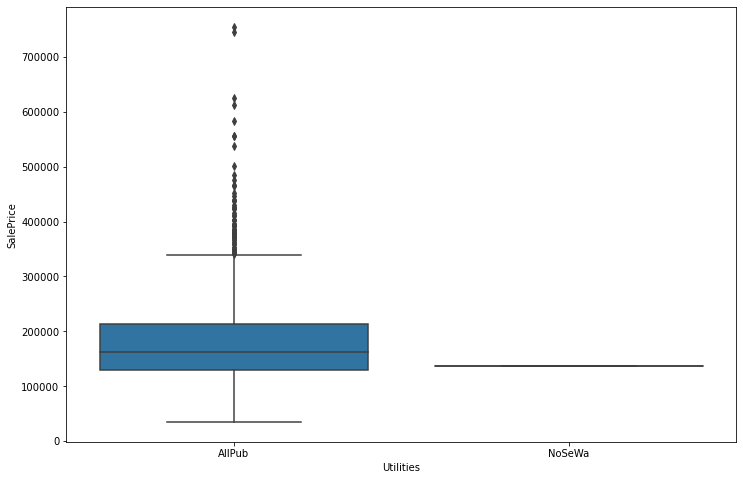

In [256]:
pie_box('Utilities', 'Type of utilities available')

In [257]:
train_data['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [258]:
for dataset in combine:
    dataset['Utilities'] = dataset['Utilities'].fillna(train_data['Utilities'].mode()[0])

Almost all properties have all public utilities. This feature might be useless.

### LotConfig

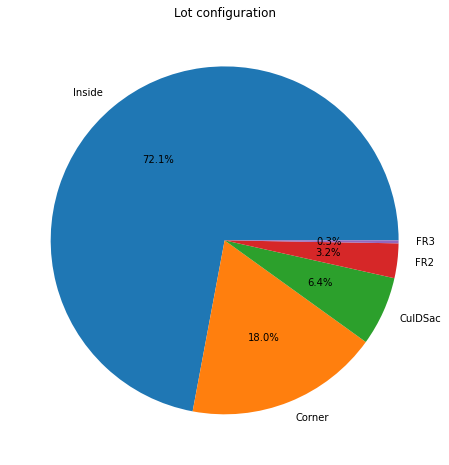

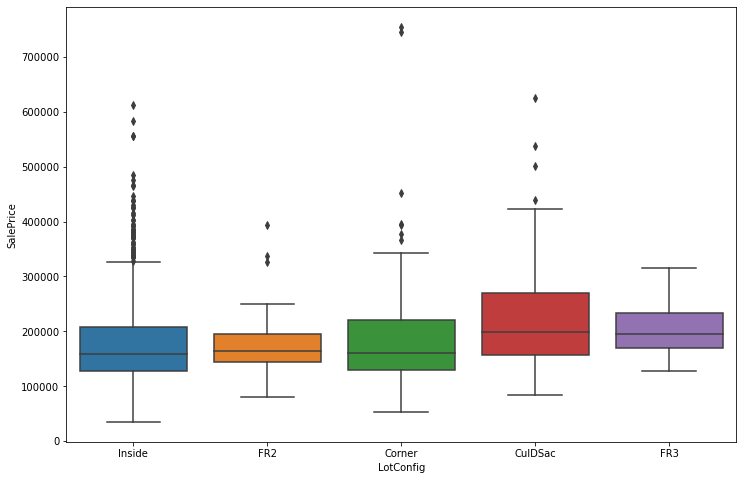

In [259]:
pie_box('LotConfig', 'Lot configuration')

### LandSlope

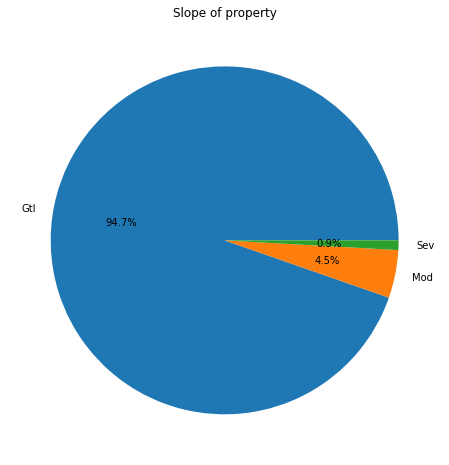

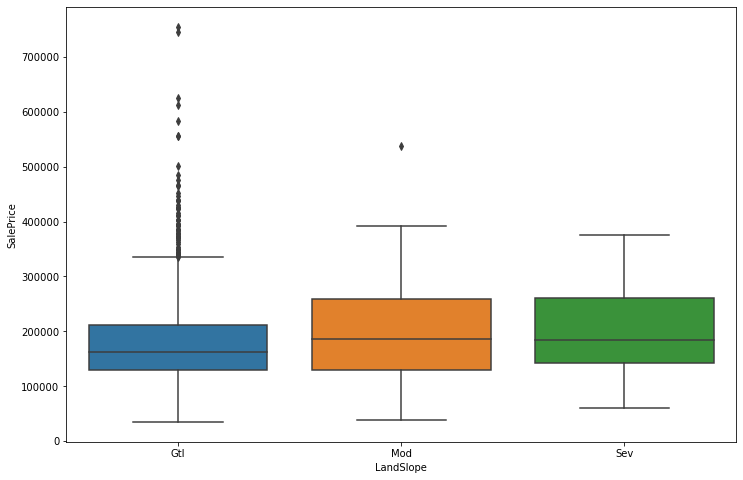

In [260]:
pie_box('LandSlope', 'Slope of property')

### Neighborhood

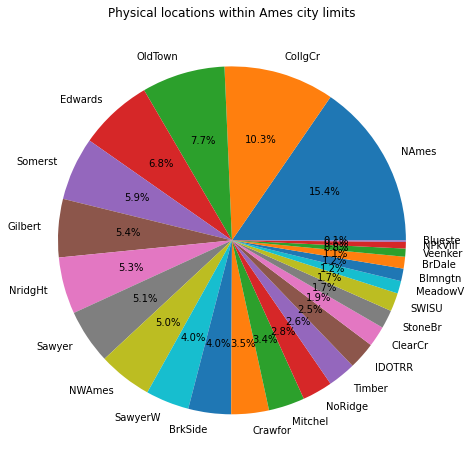

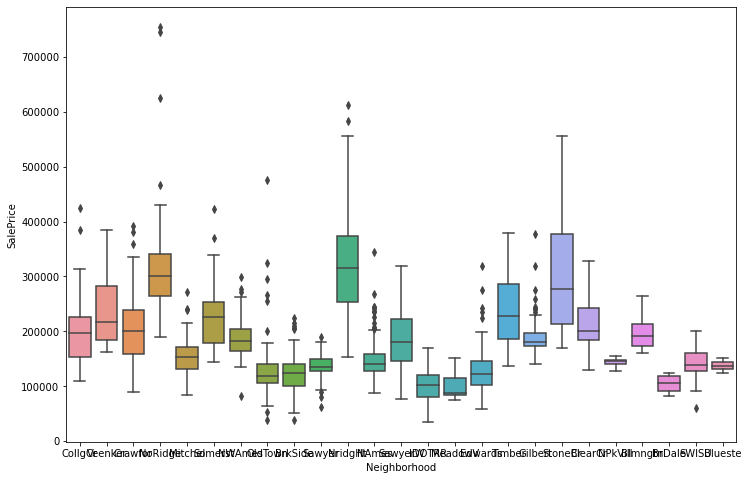

In [261]:
pie_box('Neighborhood', 'Physical locations within Ames city limits')

We can see that houses in some neighbouhoods are significantly more expensive that in the others.

### Condition1 & Condition2

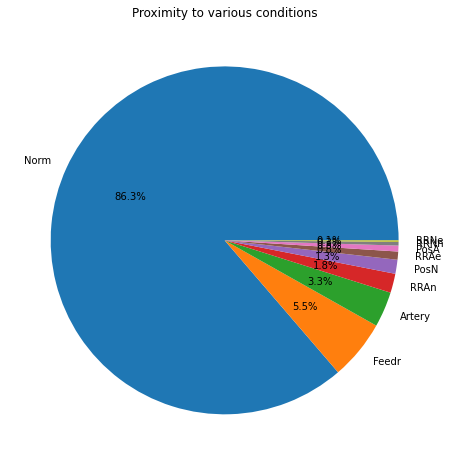

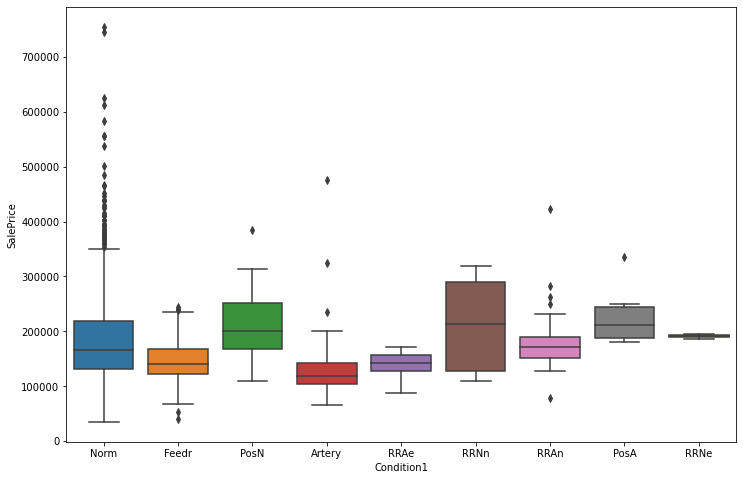

In [262]:
pie_box('Condition1', 'Proximity to various conditions')

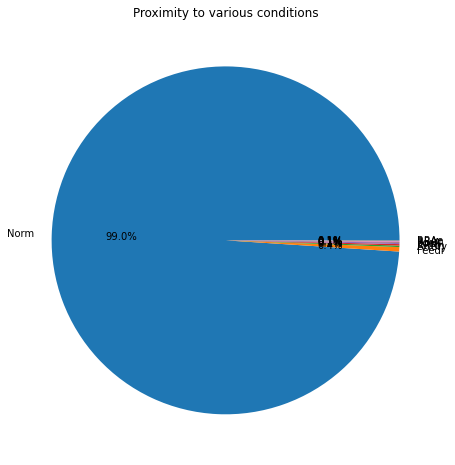

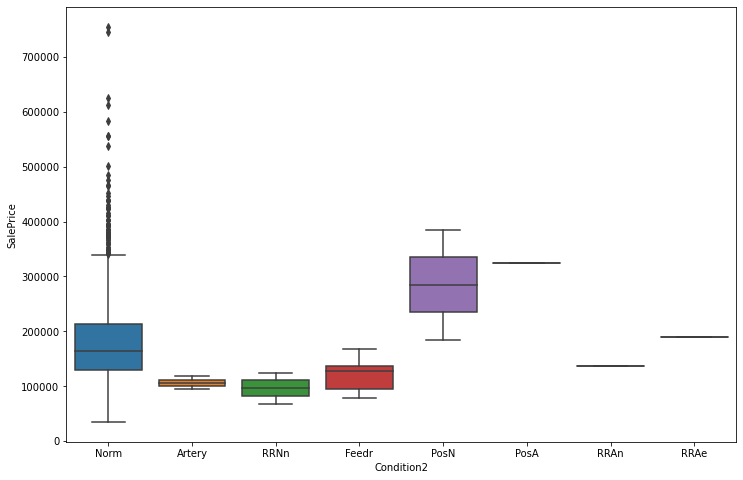

In [263]:
pie_box('Condition2', 'Proximity to various conditions')

We can combine these features into one.

### BldgType

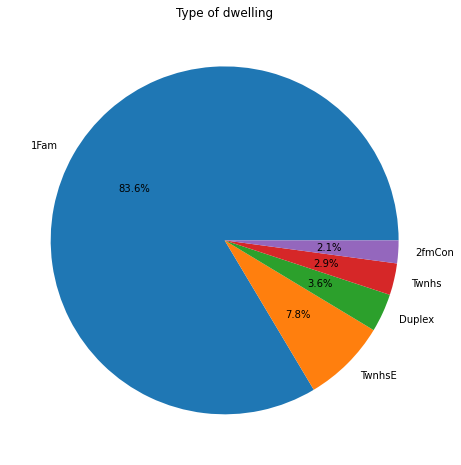

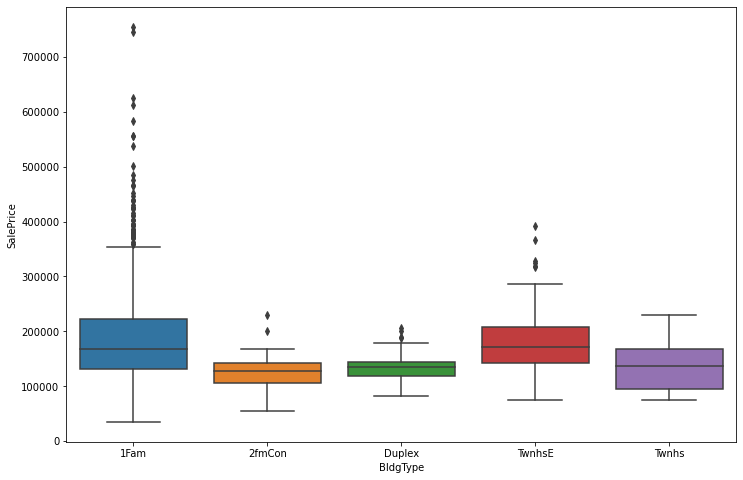

In [264]:
pie_box('BldgType', 'Type of dwelling')

### HouseStyle

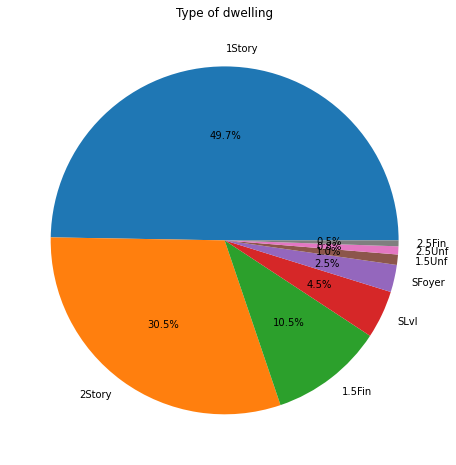

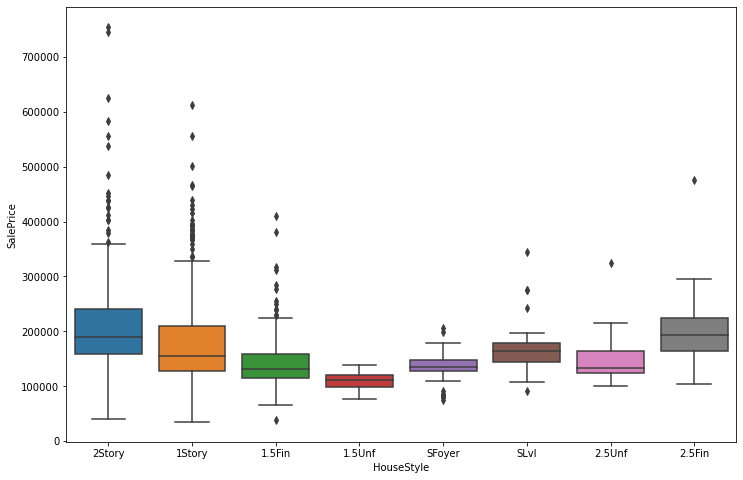

In [265]:
pie_box('HouseStyle', 'Type of dwelling')

### OverallQual

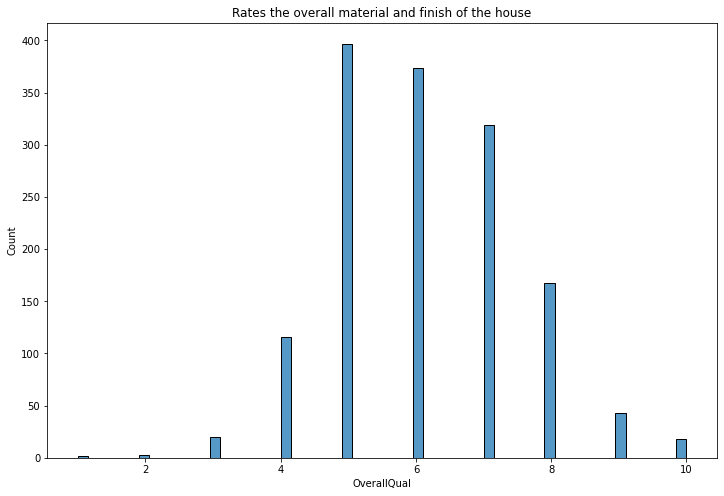

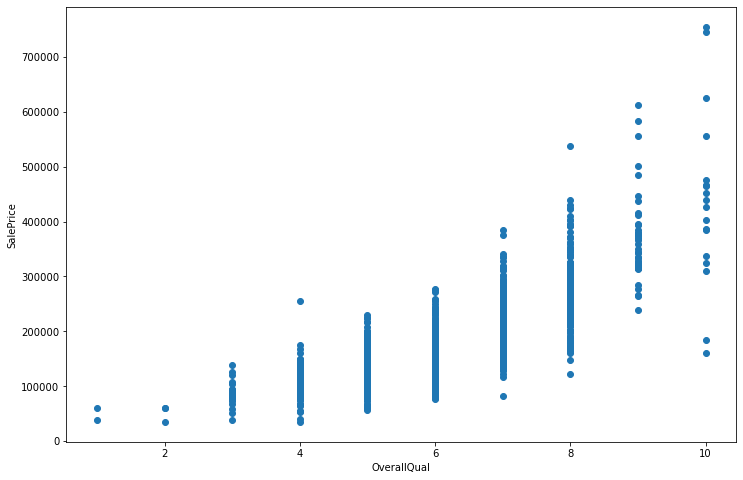

In [266]:
hist_scatter('OverallQual', 'Rates the overall material and finish of the house')

In [267]:
train_data.query('OverallQual == 10')['SalePrice'].sort_values()

1298    160000
523     184750
1442    310000
583     325000
994     337500
825     385000
224     386250
515     402861
389     426000
58      438780
591     451950
1243    465000
1373    466500
185     475000
440     555000
1169    625000
1182    745000
691     755000
Name: SalePrice, dtype: int64

In [268]:
outliers_ind.extend(train_data.query('OverallQual == 10')['SalePrice'].sort_values().head(2).index.to_list())

### OverallCond

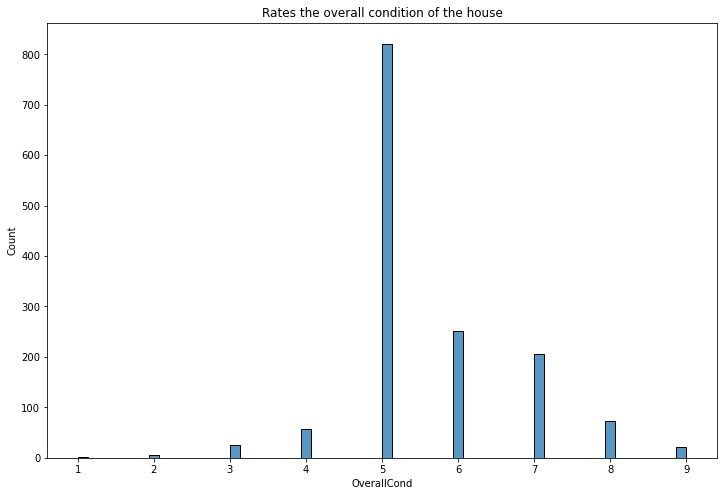

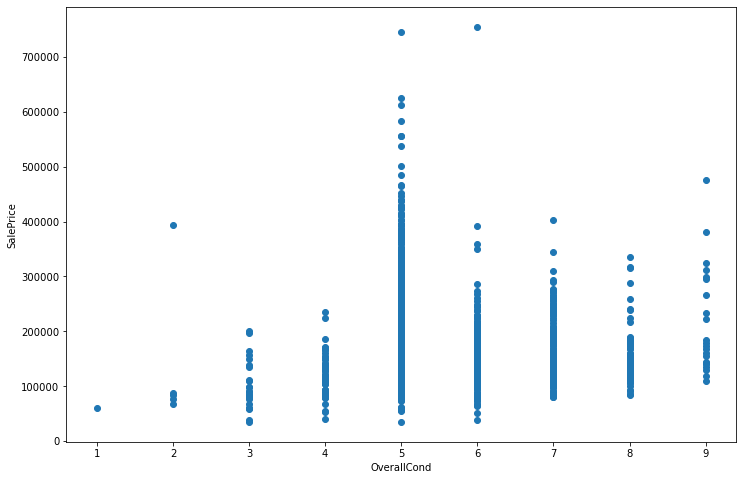

In [269]:
hist_scatter('OverallCond', 'Rates the overall condition of the house')

### YearBuilt

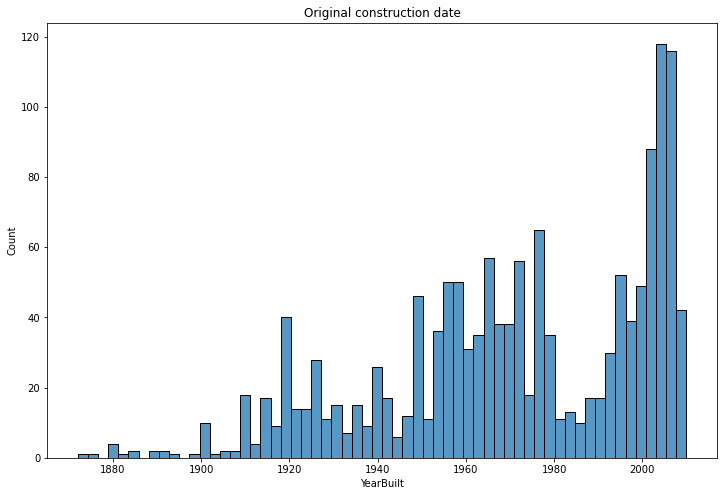

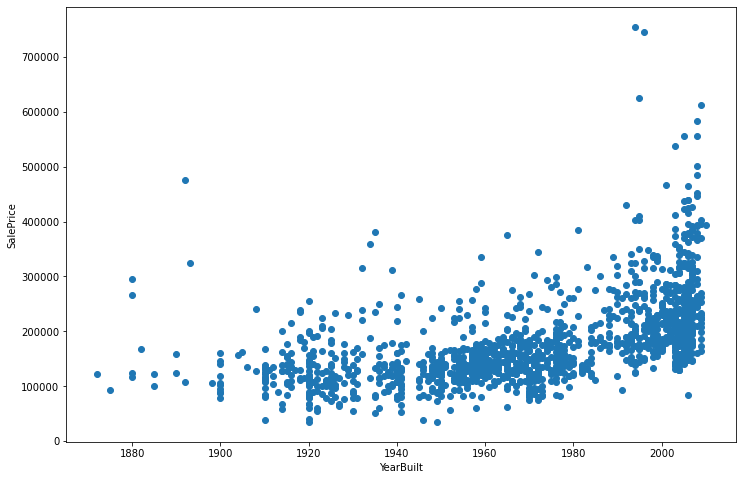

In [270]:
hist_scatter('YearBuilt', 'Original construction date')

### YearRemodAdd

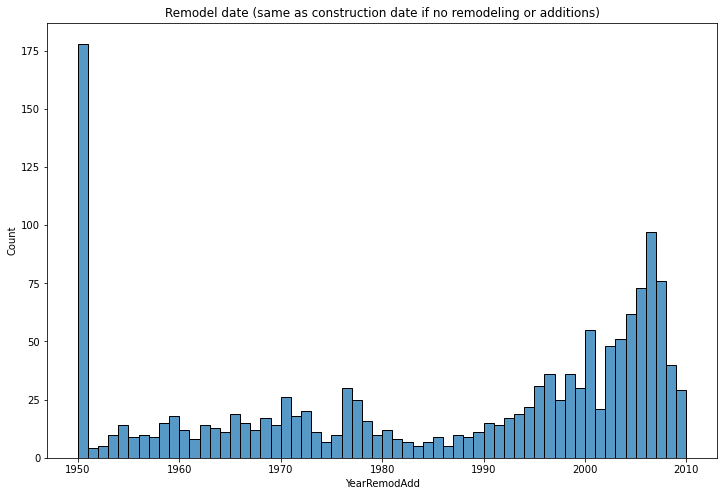

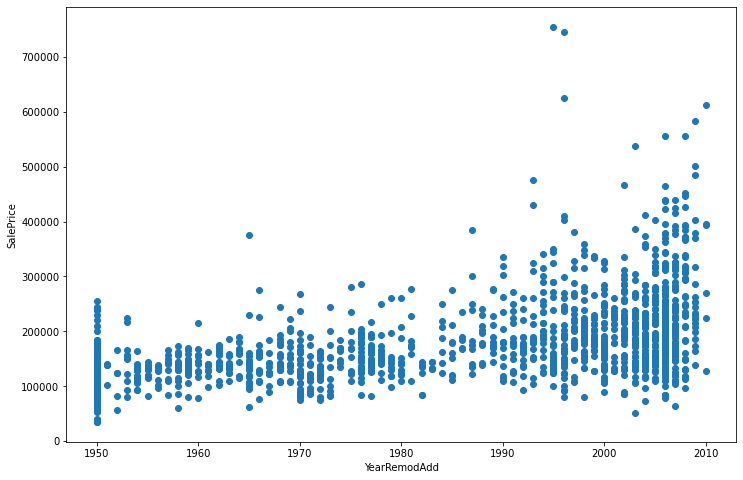

In [271]:
hist_scatter('YearRemodAdd', 'Remodel date (same as construction date if no remodeling or additions)')

### RoofStyle

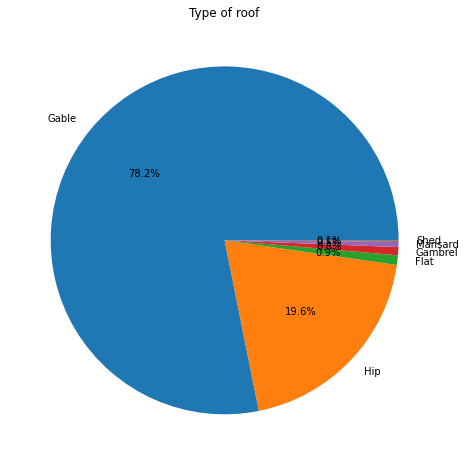

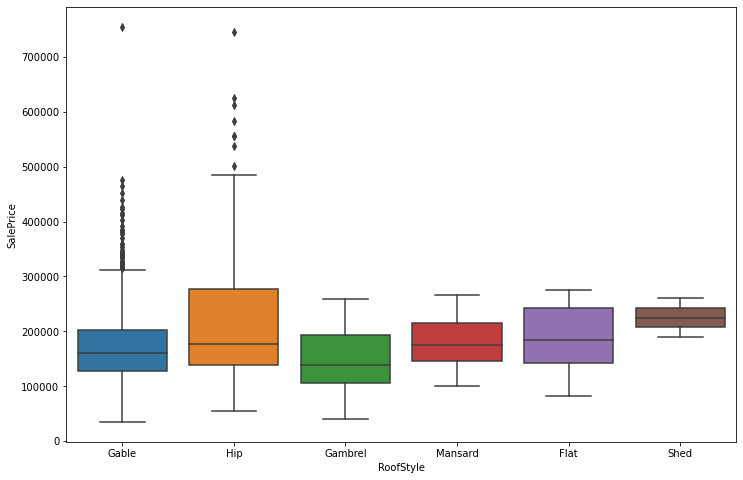

In [272]:
pie_box('RoofStyle', 'Type of roof')

<AxesSubplot:xlabel='RoofStyle', ylabel='SalePrice'>

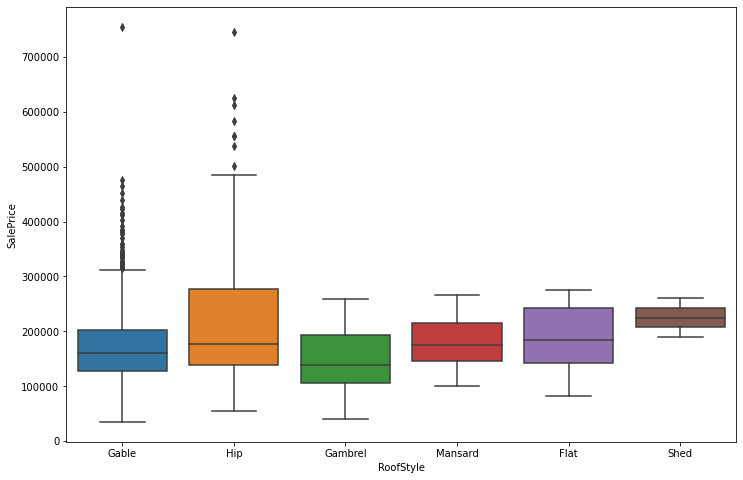

In [273]:
sns.boxplot(data=train_data, y='SalePrice' , x='RoofStyle')

### RoofMatl

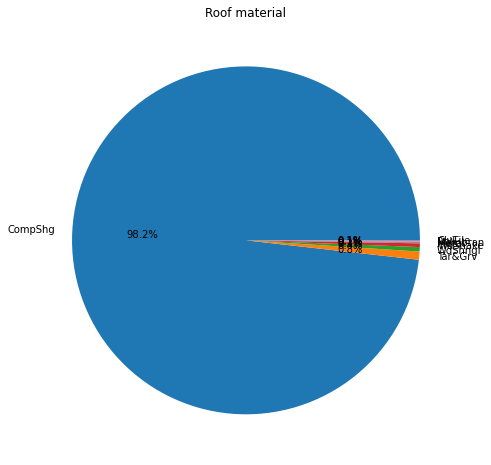

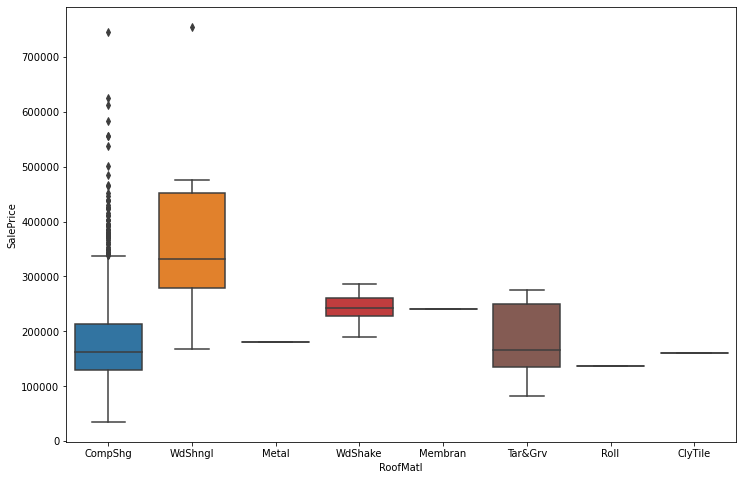

In [274]:
pie_box('RoofMatl', 'Roof material')

<AxesSubplot:xlabel='RoofMatl', ylabel='SalePrice'>

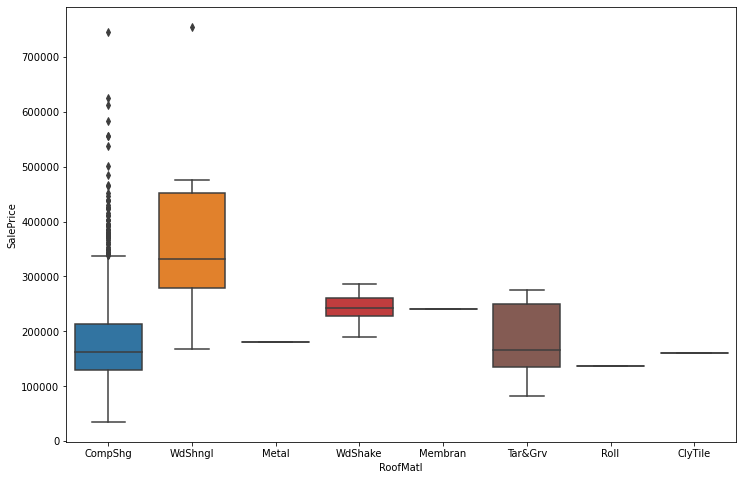

In [275]:
sns.boxplot(data=train_data, y='SalePrice' , x='RoofMatl')

### Exterior1st & Exterior2nd

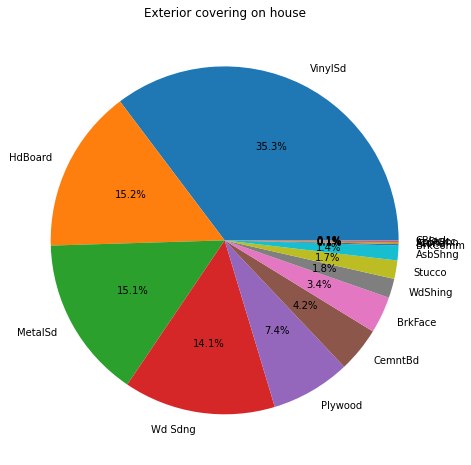

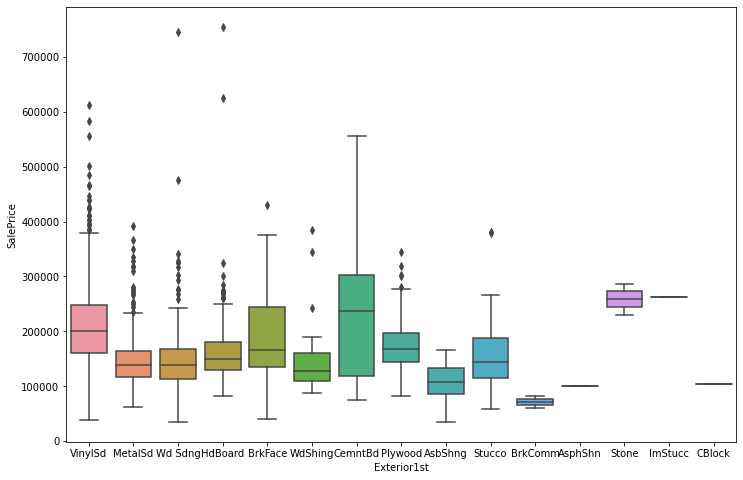

In [276]:
pie_box('Exterior1st', 'Exterior covering on house')

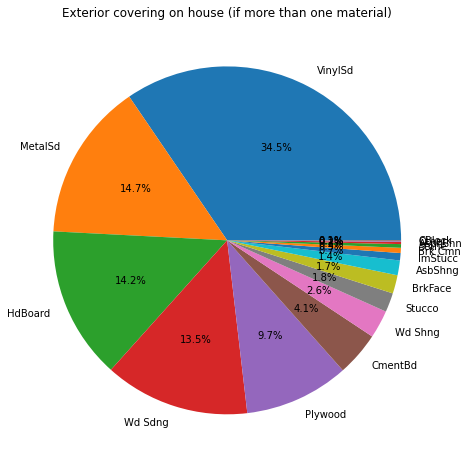

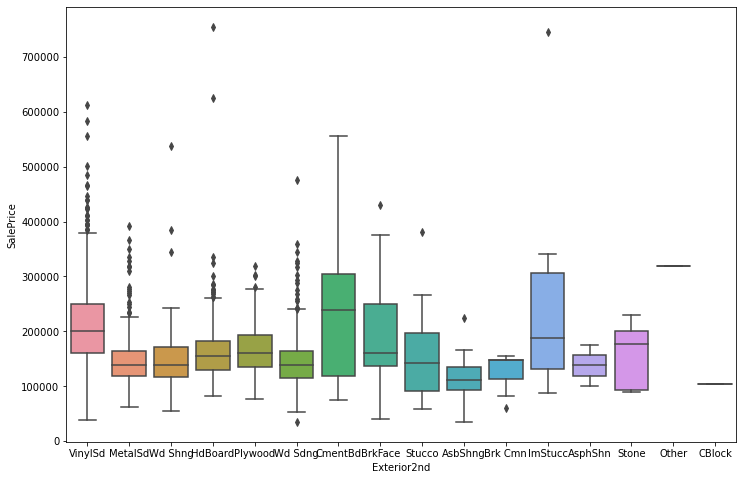

In [277]:
pie_box('Exterior2nd', 'Exterior covering on house (if more than one material)')

<AxesSubplot:xlabel='Exterior1st', ylabel='SalePrice'>

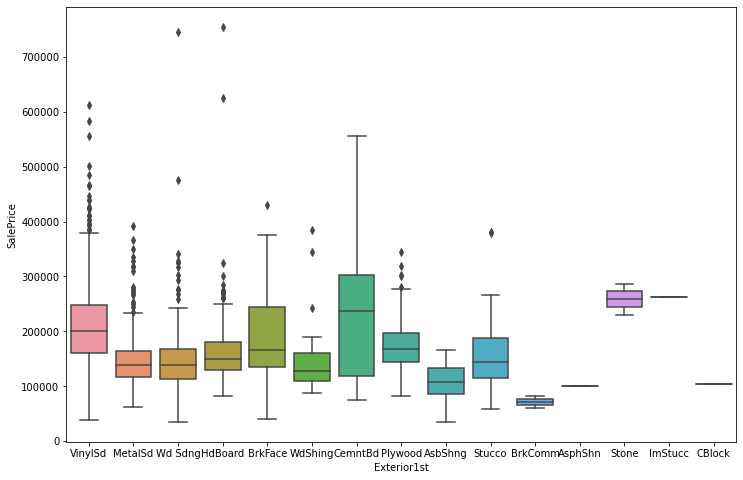

In [278]:
sns.boxplot(data=train_data, y='SalePrice' , x='Exterior1st')

In [279]:
for dataset in combine:
    dataset['Exterior1st'] = dataset['Exterior1st'].fillna(train_data['Exterior1st'].mode()[0])
    dataset['Exterior2nd'] = dataset['Exterior2nd'].fillna(train_data['Exterior2nd'].mode()[0])

### MasVnrType

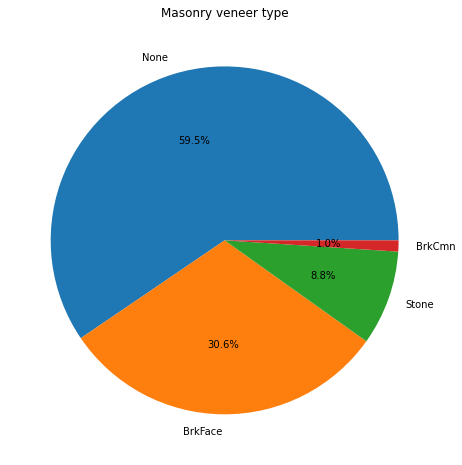

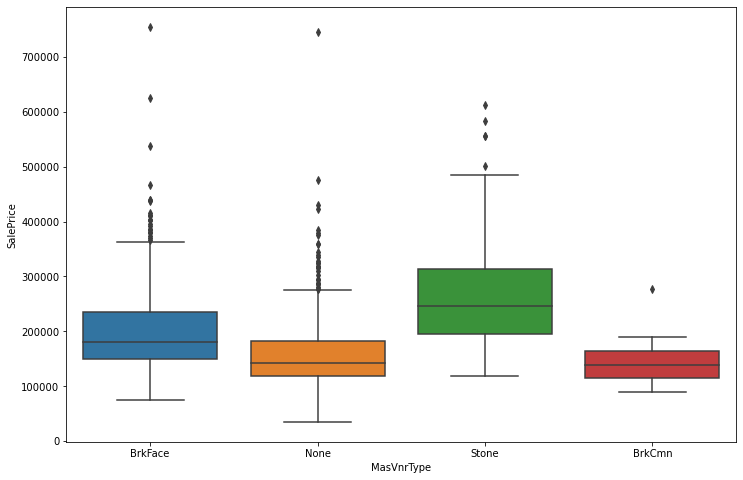

In [280]:
pie_box('MasVnrType', 'Masonry veneer type')

<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

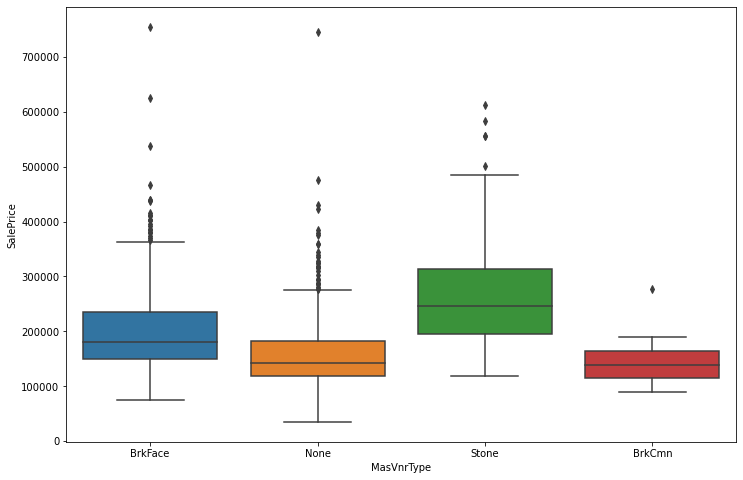

In [281]:
sns.boxplot(data=train_data, y='SalePrice' , x='MasVnrType')

In [282]:
for dataset in combine:
    dataset['MasVnrType'] = dataset['MasVnrType'].fillna(train_data['MasVnrType'].mode()[0])

### MasVnrArea

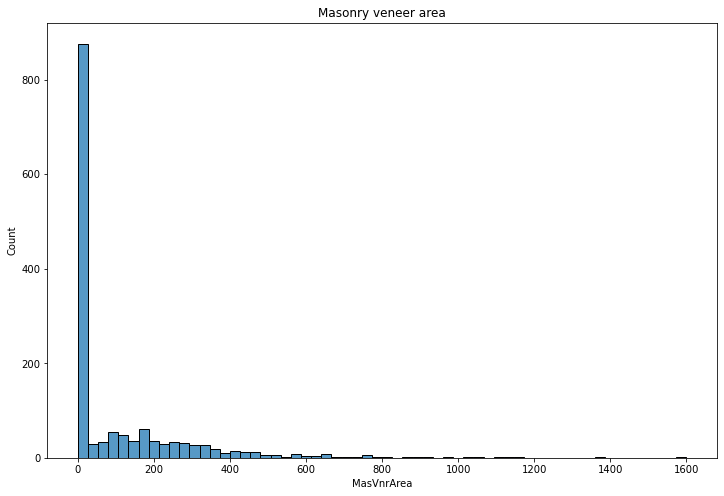

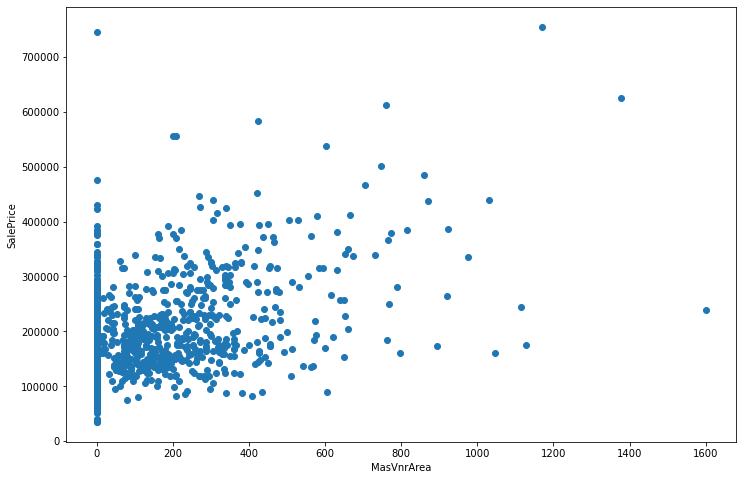

In [283]:
hist_scatter('MasVnrArea', 'Masonry veneer area')

In [284]:
for dataset in combine:
    dataset.loc[(dataset['MasVnrType'] == 'None') & (dataset['MasVnrArea'].isna()), 'MasVnrArea'] = 0
    dataset.loc[dataset['MasVnrArea'].isna(), 'MasVnrArea'] = dataset.query('MasVnrArea > 0')['MasVnrArea'].mean()

### ExterQual

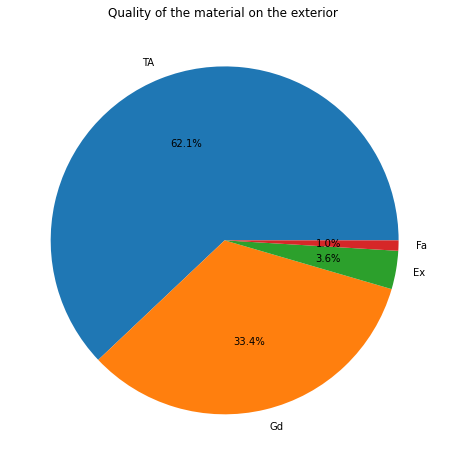

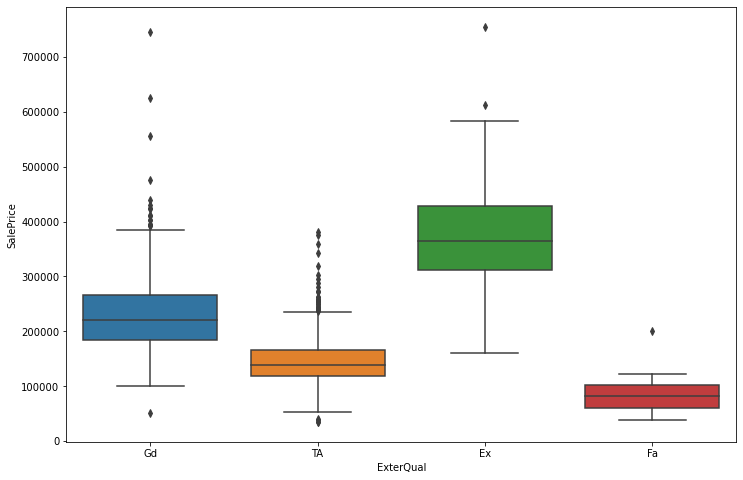

In [285]:
pie_box('ExterQual', 'Quality of the material on the exterior ')

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

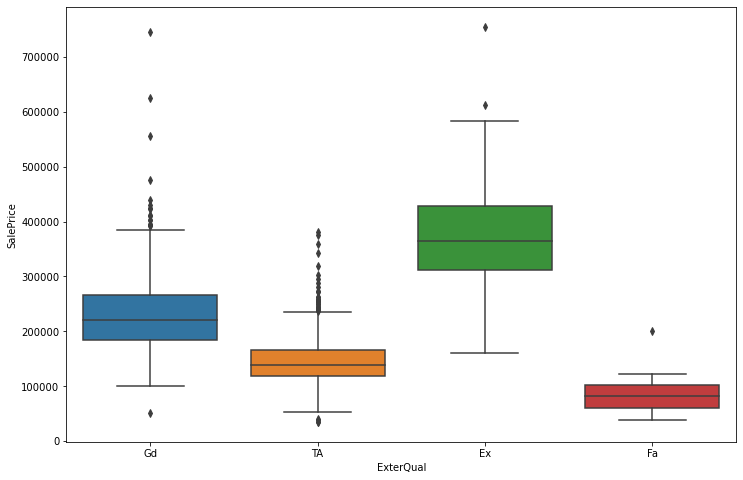

In [286]:
sns.boxplot(data=train_data, y='SalePrice' , x='ExterQual')

### ExterCond

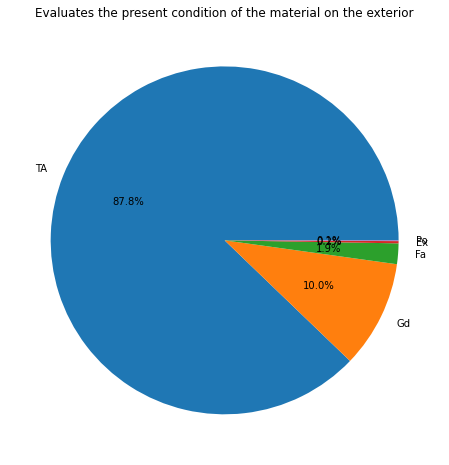

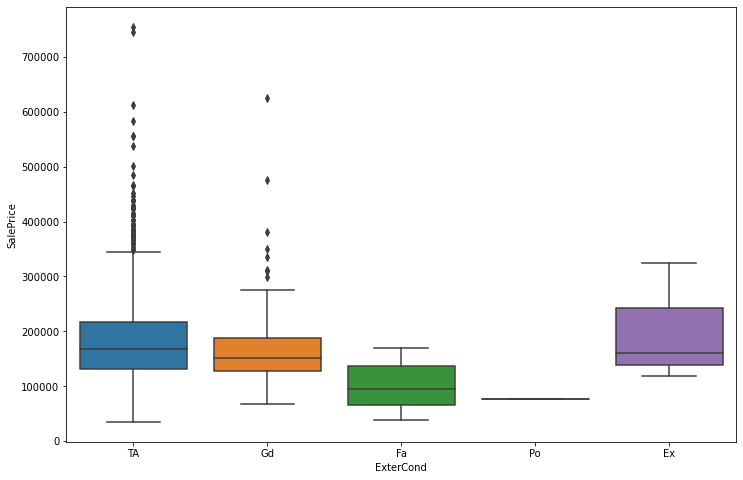

In [287]:
pie_box('ExterCond', 'Evaluates the present condition of the material on the exterior')

### Foundation

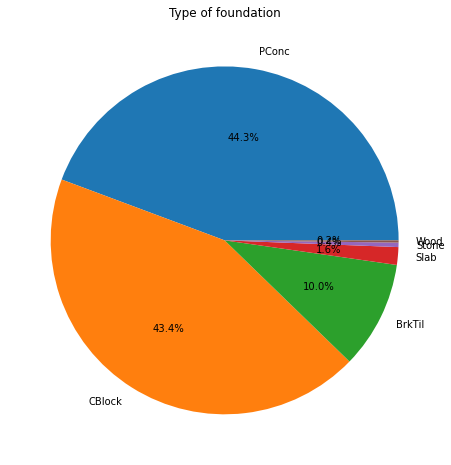

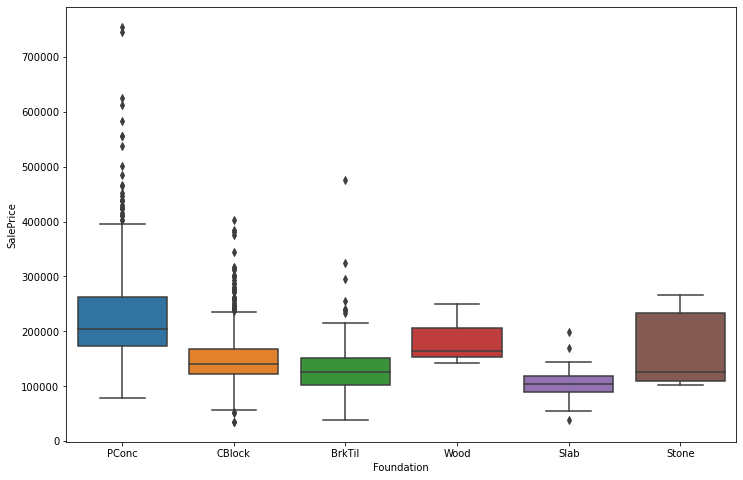

In [288]:
pie_box('Foundation', 'Type of foundation')

### BsmtQual

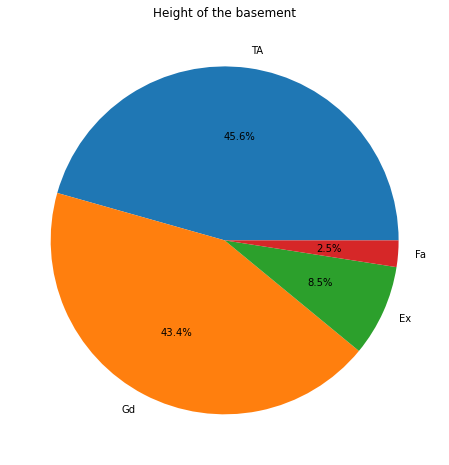

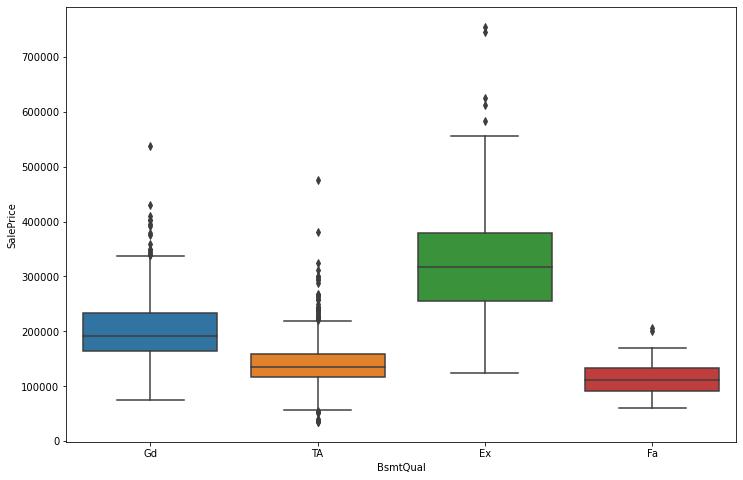

In [289]:
pie_box('BsmtQual', 'Height of the basement')

In [290]:
for dataset in combine:
    dataset['BsmtQual'] = dataset['BsmtQual'].fillna('NA')

### BsmtCond

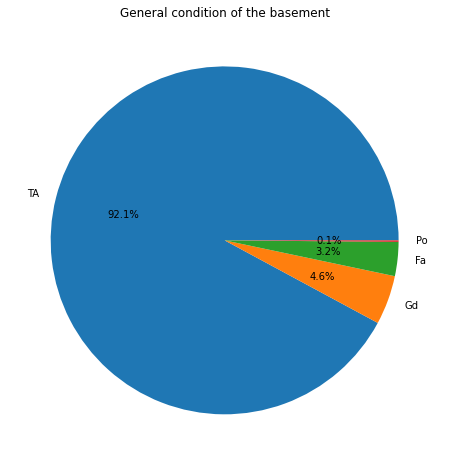

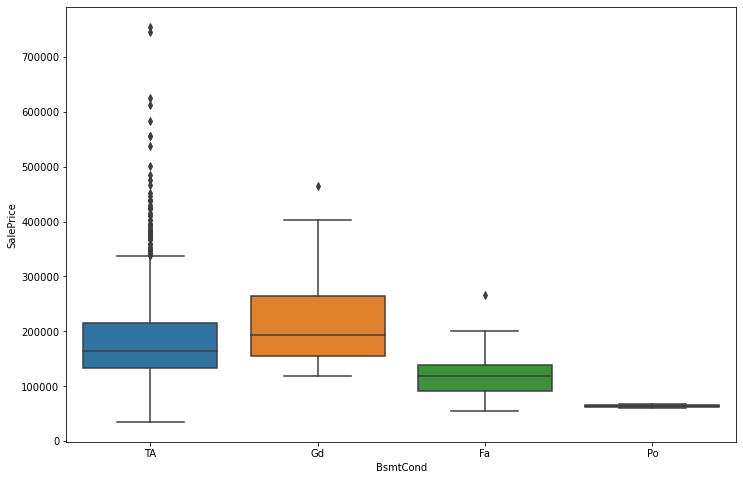

In [291]:
pie_box('BsmtCond', 'General condition of the basement')

In [292]:
for dataset in combine:
    dataset['BsmtCond'] = dataset['BsmtCond'].fillna('NA')

### BsmtExposure

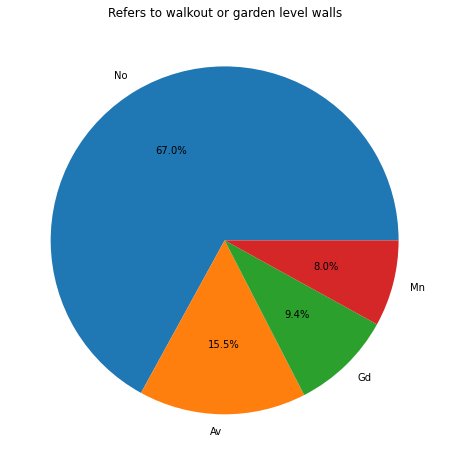

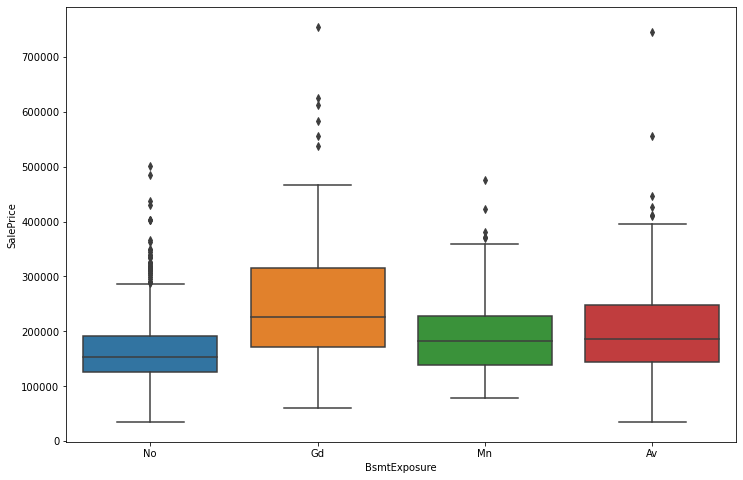

In [293]:
pie_box('BsmtExposure', 'Refers to walkout or garden level walls')

In [294]:
for dataset in combine:
    dataset['BsmtExposure'] = dataset['BsmtExposure'].fillna('NA')

### BsmtFinType1

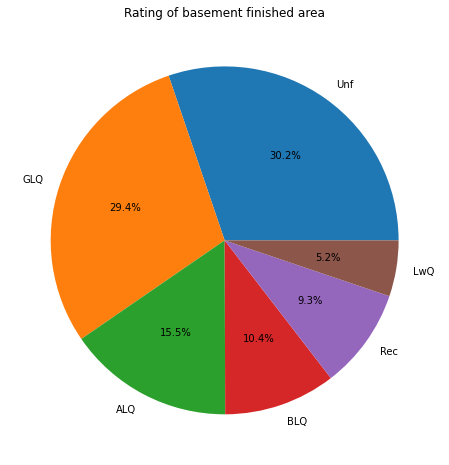

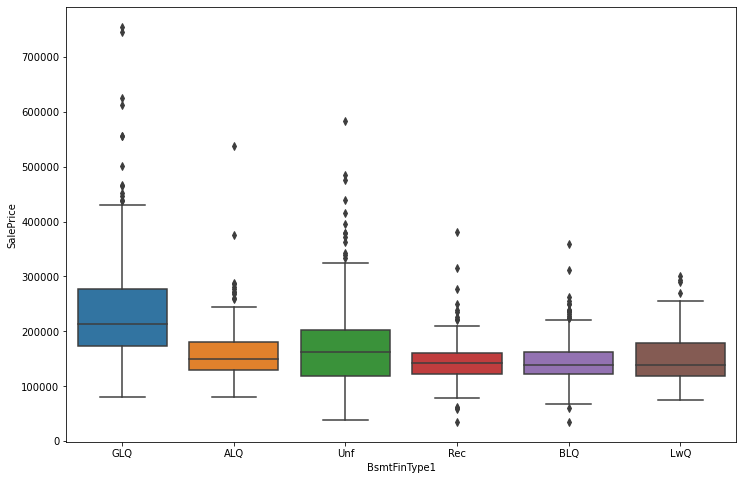

In [295]:
pie_box('BsmtFinType1', 'Rating of basement finished area')

In [296]:
dataset[dataset['BsmtFinType1'].isna()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
125   1586          30       RL    67.000000     8777   Pave    NA      Reg   
133   1594          90       RH    60.000000     7200   Pave  Pave      Reg   
269   1730          90       RL    75.000000     8250   Pave    NA      Reg   
318   1779          20       RL    75.000000     9533   Pave    NA      Reg   
354   1815          30       RM    50.000000     5925   Pave    NA      Reg   
387   1848          20       RL    58.085105     9000   Pave    NA      Reg   
388   1849          20       RL    80.372133    15635   Pave    NA      IR1   
396   1857          70       RL   120.000000    26400   Pave    NA      Reg   
397   1858          90       RL    64.000000     7018   Pave    NA      Reg   
398   1859          90       RL    64.000000     7018   Pave    NA      Reg   
400   1861          90       RL    64.000000     7007   Pave    NA      Reg   
455   1916          30       RL   109.000000    21780   Grvl    NA      Reg   
590   2051          20       RL    74.000000     7785   Pave    NA      IR1   
606   2067          20       RL    71.000000     8838   Pave    NA      Reg   
608   2069          20       RL    60.000000    10122   Pave    NA      Reg   
660   2121          20       RM    99.000000     5940   Pave    NA      IR1   
662   2123          30       RM    58.669562     6120   Pave    NA      Reg   
728   2189          20       RL   123.000000    47007   Pave    NA      IR1   
729   2190          90       RL    65.000000     6012   Pave    NA      Reg   
730   2191          90       RL    74.000000     6845   Pave    NA      Reg   
733   2194          50       RL    57.000000     8050   Pave    NA      Reg   
756   2217          20       RL    80.000000    14584   Pave    NA      Reg   
764   2225          90       RL    76.000000    10260   Pave    NA      Reg   
927   2388          90       RL    72.395354    10899   Pave    NA      IR1   
975   2436          20       RL    70.000000     7000   Pave    NA      Reg   
992   2453          20       RM    52.000000     8626   Pave    NA      Reg   
993   2454          80       RM    76.000000    11800   Pave    NA      Reg   
1030  2491          20       RL    65.592988     9000   Pave    NA      Reg   
1038  2499          30       RL    66.731739    11515   Pave    NA      IR1   
1087  2548          90       RL    68.379574     9555   Pave    NA      IR1   
1092  2553          90       RL    74.000000     6882   Pave    NA      Reg   
1104  2565          20       RL   126.000000    13108   Pave    NA      IR2   
1118  2579          50       RM    64.000000    11067   Pave    NA      Reg   
1139  2600          20       RL   200.000000    43500   Pave    NA      Reg   
1242  2703          90       RM    68.000000     8927   Pave    NA      Reg   
1303  2764          20       RL    86.000000    11650   Pave    NA      Reg   
1306  2767          90       RL    60.000000     8544   Pave    NA      Reg   
1343  2804          20       RL   100.000000    21370   Pave    NA      Reg   
1344  2805          30       RL    55.000000     8250   Pave    NA      Reg   
1364  2825          20       RL    80.000000    12048   Pave    NA      Reg   
1431  2892          30  C (all)    69.000000    12366   Pave    NA      Reg   
1444  2905          20       RL   125.000000    31250   Pave    NA      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
125          Lvl    AllPub    Inside       Mod      Edwards      Feedr   
133          Lvl    AllPub    Inside       Gtl        SWISU       Norm   
269          Lvl    AllPub    Inside       Gtl      SawyerW       Norm   
318          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
354          Lvl    AllPub    Corner       Gtl      OldTown       Norm   
387          Lvl    AllPub    Corner       Gtl       Sawyer       Norm   
388          Lvl    AllPub   CulDSac       Gtl      Edwards       Norm   
396          Bnk  

In [297]:
for dataset in combine:
    dataset['BsmtFinType1'] = dataset['BsmtFinType1'].fillna('NA')

### BsmtFinSF1

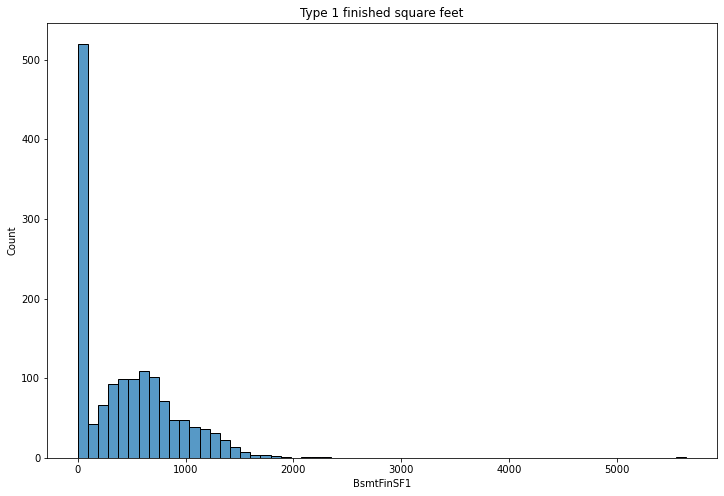

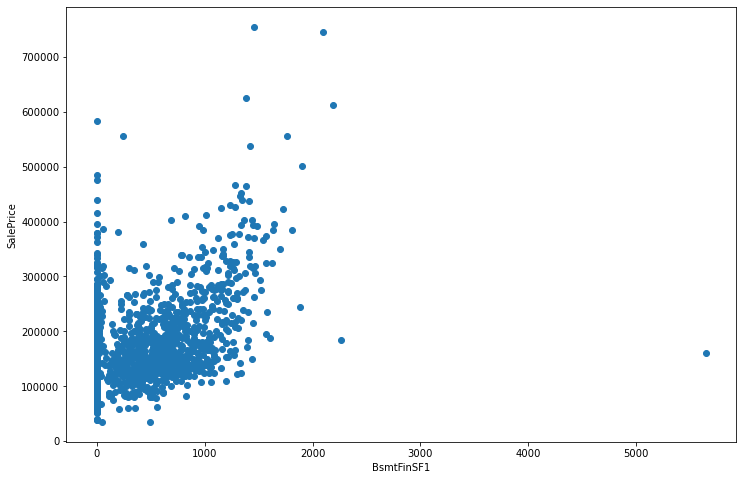

In [298]:
hist_scatter('BsmtFinSF1', 'Type 1 finished square feet')

In [299]:
for dataset in combine:
    dataset.loc[(dataset['BsmtFinType1'] == 'NA') & (dataset['BsmtFinSF1'].isna()), 'BsmtFinSF1'] = 0
    dataset.loc[dataset['BsmtFinSF1'].isna(), 'BsmtFinSF1'] = dataset.query('BsmtFinSF1 > 0')['BsmtFinSF1'].mean()

### BsmtFinType2

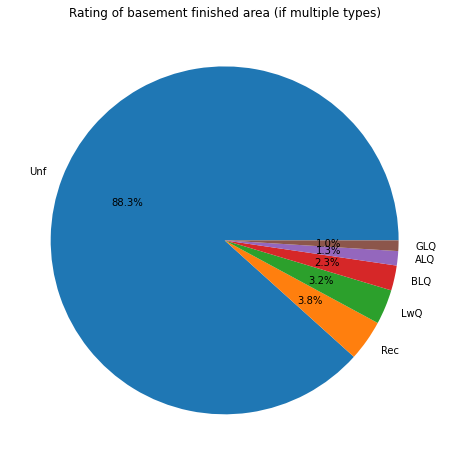

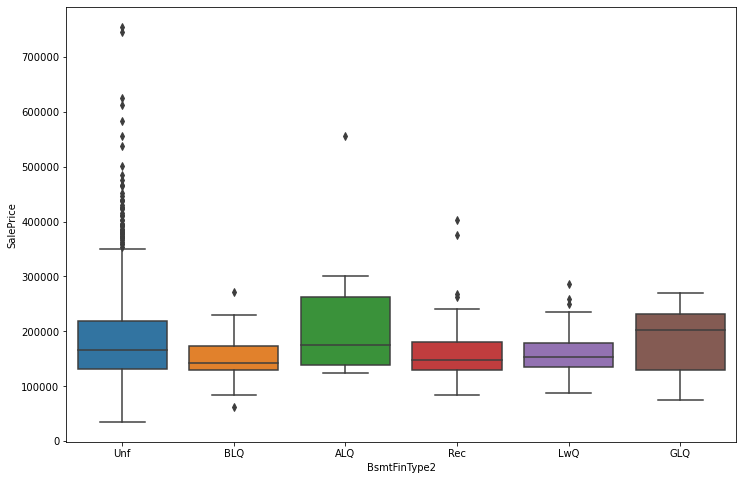

In [300]:
pie_box('BsmtFinType2', 'Rating of basement finished area (if multiple types)')

In [301]:
for dataset in combine:
    dataset['BsmtFinType2'] = dataset['BsmtFinType2'].fillna('NA')

### BsmtFinSF2

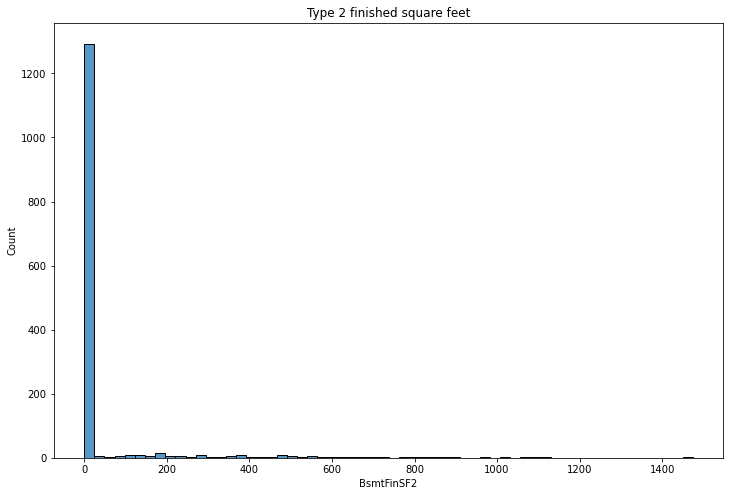

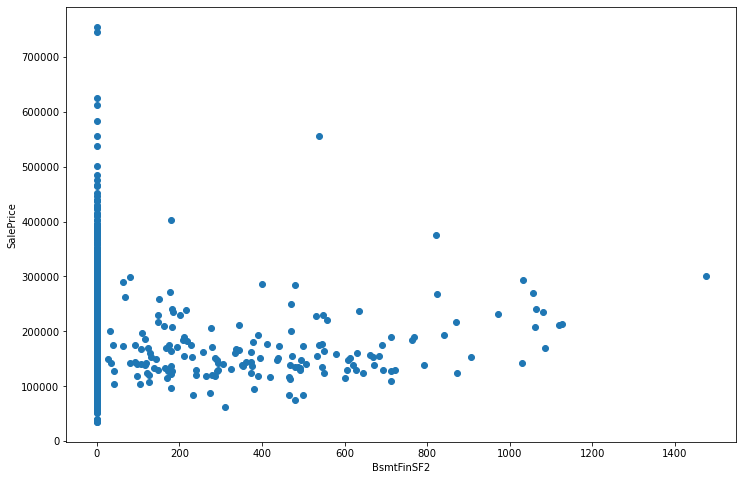

In [302]:
hist_scatter('BsmtFinSF2', 'Type 2 finished square feet')

In [303]:
for dataset in combine:
    dataset.loc[(dataset['BsmtFinType2'] == 'NA') & (dataset['BsmtFinSF2'].isna()), 'BsmtFinSF2'] = 0
    dataset.loc[dataset['BsmtFinSF2'].isna(), 'BsmtFinSF2'] = dataset.query('BsmtFinSF2 > 0')['BsmtFinSF2'].mean()

Almost all of the houses have only one type of basement finishing, so this feature is not significant.

### BsmtUnfSF

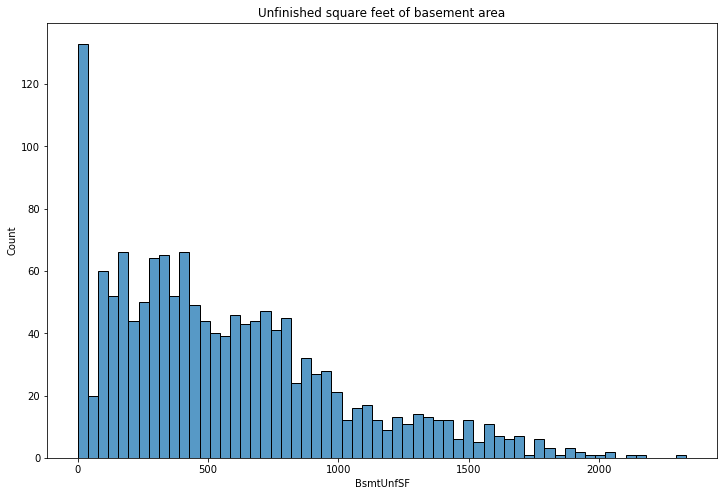

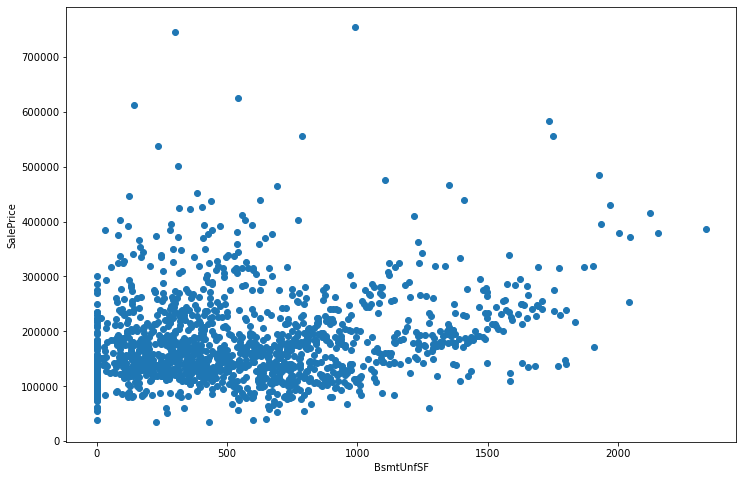

In [304]:
hist_scatter('BsmtUnfSF', 'Unfinished square feet of basement area')

In [305]:
for dataset in combine:
    dataset.loc[(dataset['BsmtExposure'] == 'NA') & (dataset['BsmtUnfSF'].isna()), 'BsmtUnfSF'] = 0
    dataset.loc[dataset['BsmtUnfSF'].isna(), 'BsmtUnfSF'] = dataset.query('BsmtUnfSF > 0')['BsmtUnfSF'].mean()

There is a lot of unfinished basements, we can try to combine all the information about basement into three  features, total basement area, unfinished basement area and good quality basement area.

### TotalBsmtSF

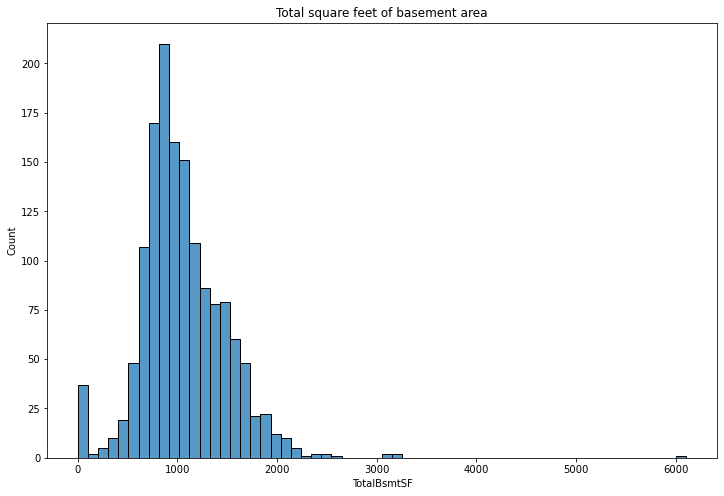

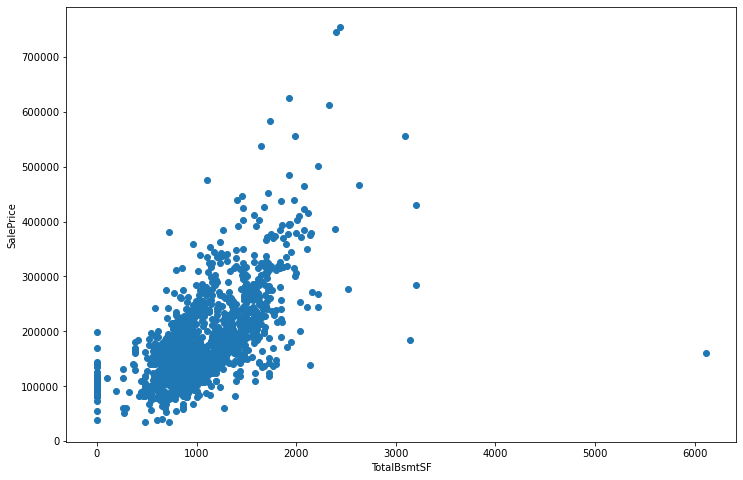

In [306]:
hist_scatter('TotalBsmtSF', 'Total square feet of basement area')

In [307]:
for dataset in combine:
    dataset.loc[dataset['TotalBsmtSF'].isna(), 'TotalBsmtSF'] = dataset['BsmtFinSF1'] + dataset['BsmtFinSF2'] + dataset['BsmtUnfSF']

In [308]:
train_data.query('TotalBsmtSF > 6000')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1298  1299          60       RL        313.0    63887   Pave    NA      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1298       Norm     1Fam     2Story           10            5       2008   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1298       796.0        Ex        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1298           Gd          GLQ      5644.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1298      466.0         6110    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1298      4692       950             0       5642             2             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1298         2         1             3             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1298            12        Typ           3          Gd     Attchd       2008.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1298          Fin           2        1418         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1298         214          292              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1298       480     Gd   NaN         NaN        0       1    2008      New   

     SaleCondition  SalePrice  
1298       Partial     160000

In [309]:
outliers_ind.extend(train_data.query('TotalBsmtSF > 6000').index.to_list())

### Heating

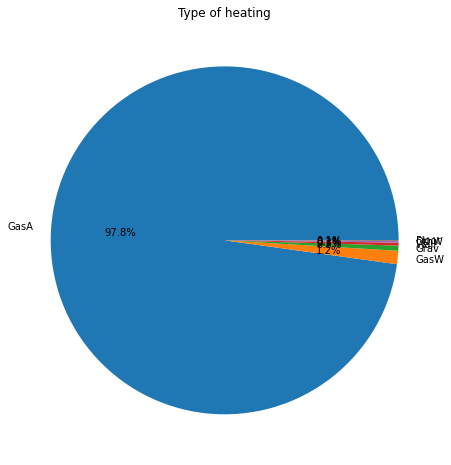

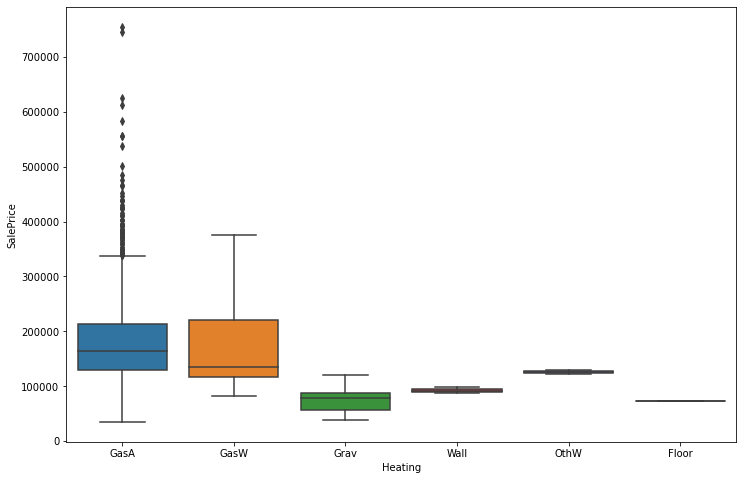

In [310]:
pie_box('Heating', 'Type of heating')

### HeatingQC

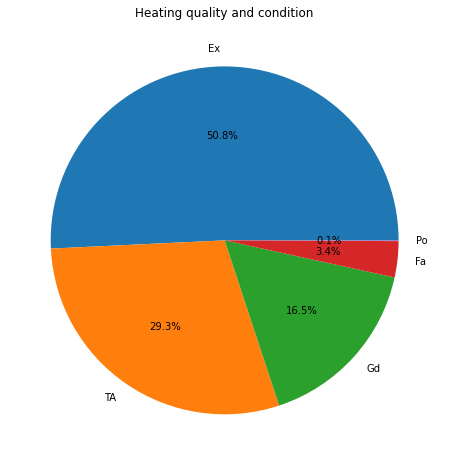

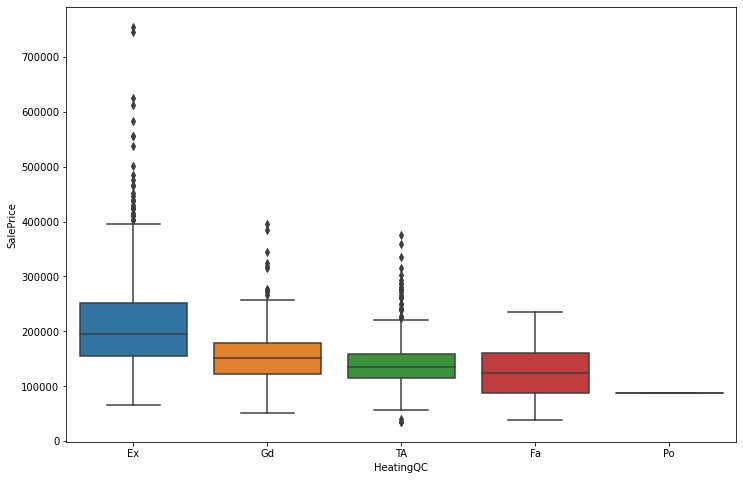

In [311]:
pie_box('HeatingQC', 'Heating quality and condition')

### CentralAir

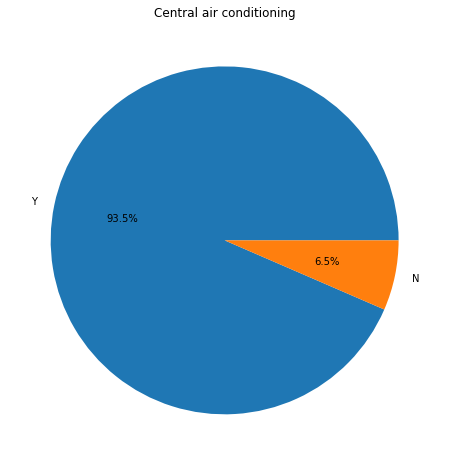

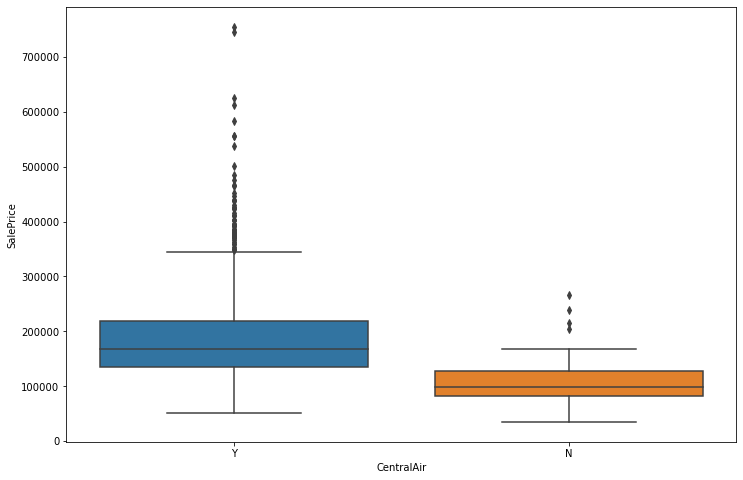

In [312]:
pie_box('CentralAir', 'Central air conditioning')

### Electrical

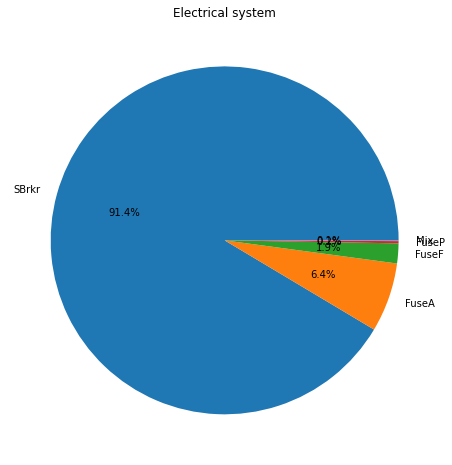

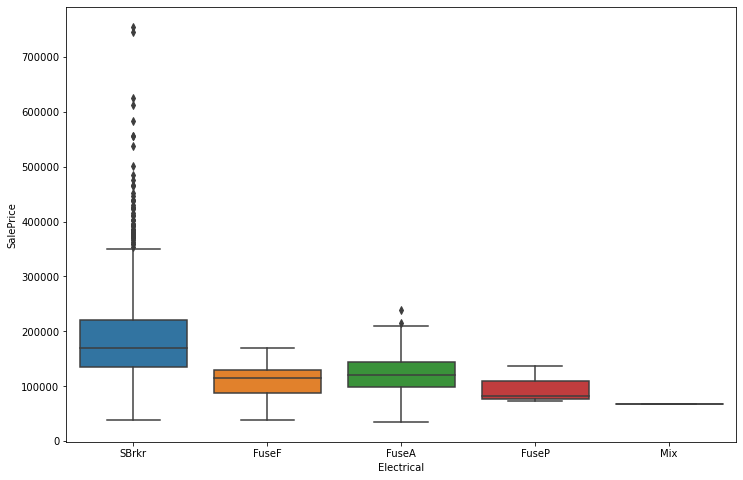

In [313]:
pie_box('Electrical', 'Electrical system')

In [314]:
train_data[train_data['Electrical'].isna()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1379  1380          80       RL         73.0     9735   Pave    NA      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1379         Lvl    AllPub    Inside       Gtl       Timber       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1379       Norm     1Fam       SLvl            5            5       2006   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1379          2007     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1379         0.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1379           No          Unf         0.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1379      384.0          384    GasA        Gd          Y        NaN   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1379       754       640             0       1394             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1379         2         1             3             1          Gd   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1379             7        Typ           0         NaN    BuiltIn       2007.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1379          Fin           2         400         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1379         100            0              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1379         0    NaN   NaN         NaN        0       5    2008       WD   

     SaleCondition  SalePrice  
1379        Normal     167500

In [315]:
for dataset in combine:
    dataset['Electrical'] = dataset['Electrical'].fillna(train_data['Electrical'].mode()[0])

### 1stFlrSF

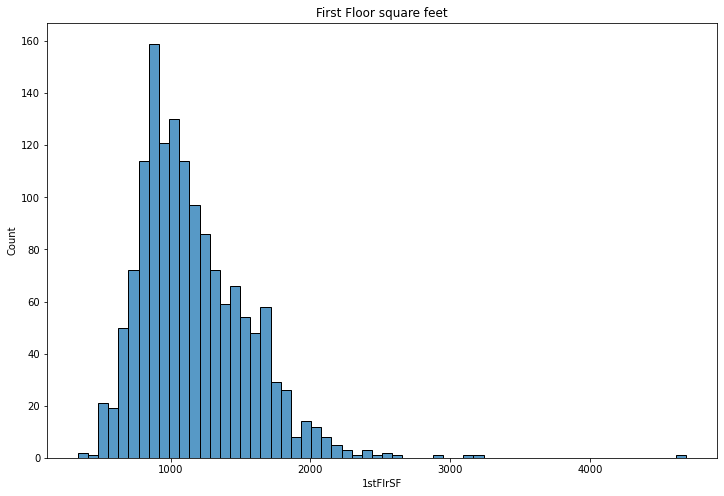

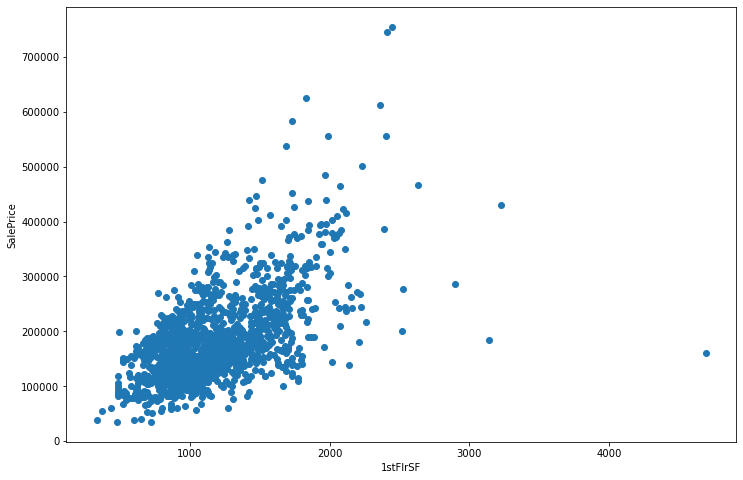

In [316]:
hist_scatter('1stFlrSF', 'First Floor square feet')

In [317]:
train_data['1stFlrSF'].corr(train_data['SalePrice'])

0.6058521846919148

In [318]:
train_data[train_data['1stFlrSF'] > 4000]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1298  1299          60       RL        313.0    63887   Pave    NA      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1298       Norm     1Fam     2Story           10            5       2008   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1298       796.0        Ex        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1298           Gd          GLQ      5644.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1298      466.0         6110    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1298      4692       950             0       5642             2             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1298         2         1             3             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1298            12        Typ           3          Gd     Attchd       2008.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1298          Fin           2        1418         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1298         214          292              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1298       480     Gd   NaN         NaN        0       1    2008      New   

     SaleCondition  SalePrice  
1298       Partial     160000

In [319]:
outliers_ind.extend(train_data[train_data['1stFlrSF'] > 4000].index.to_list())

### 2ndFlrSF

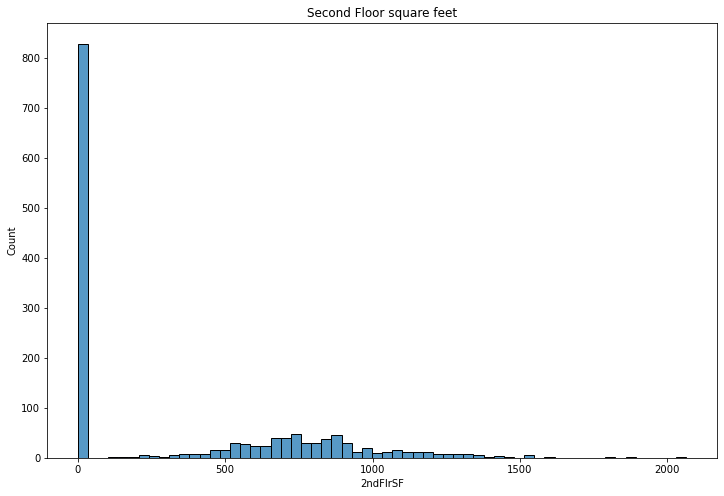

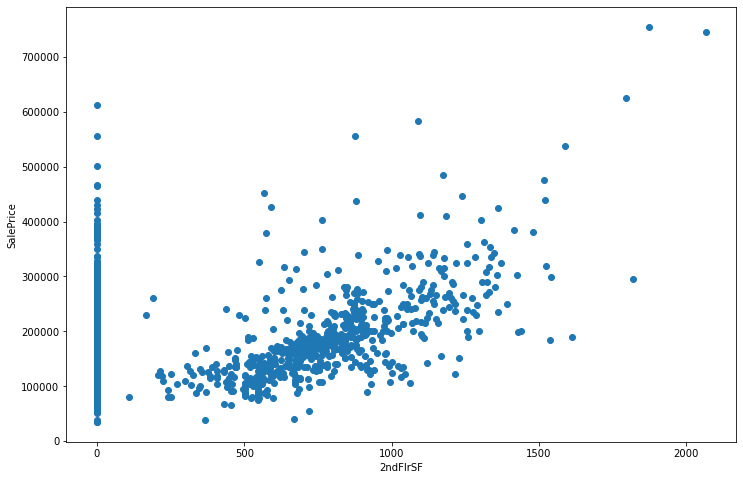

In [320]:
hist_scatter('2ndFlrSF', 'Second Floor square feet')

In [321]:
train_data['2ndFlrSF'].corr(train_data['SalePrice'])

0.31933380283206764

### LowQualFinSF

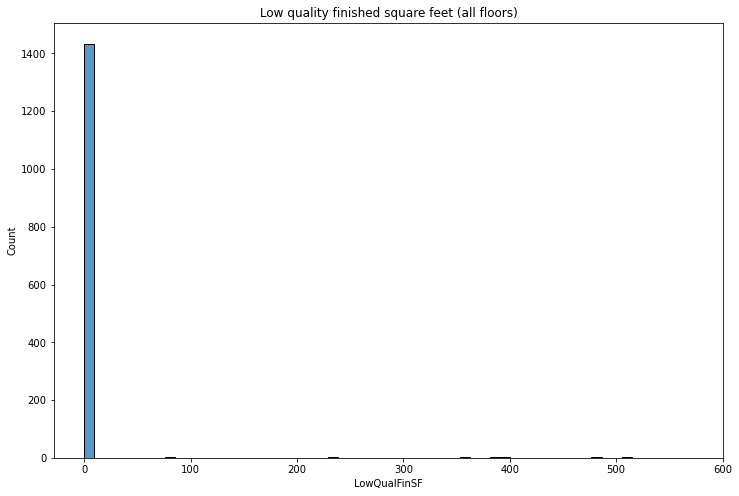

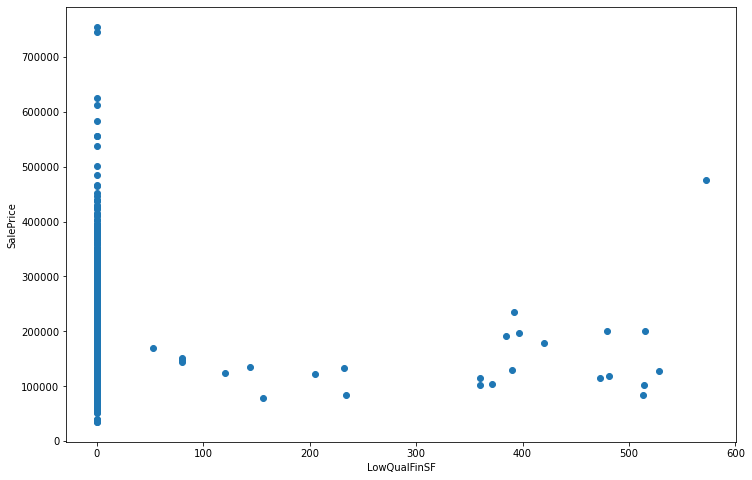

In [322]:
hist_scatter('LowQualFinSF', 'Low quality finished square feet (all floors)')

In [323]:
train_data['LowQualFinSF'].corr(train_data['SalePrice'])

-0.025606130000679586

In [324]:
train_data.query('LowQualFinSF > 0')['LowQualFinSF'].count()

26

### GrLivArea

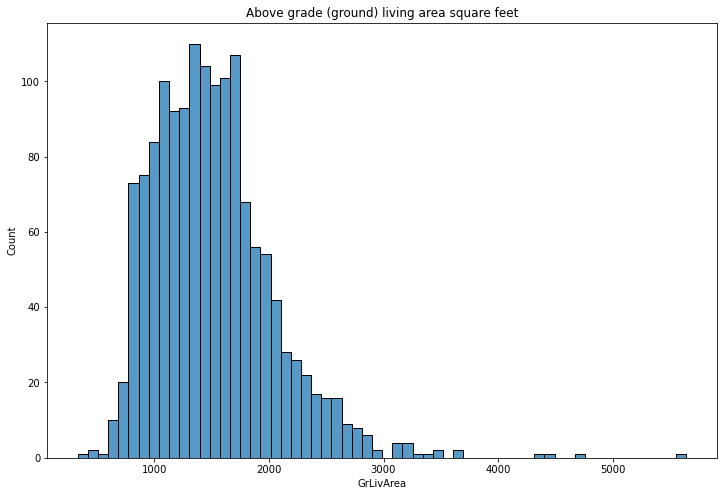

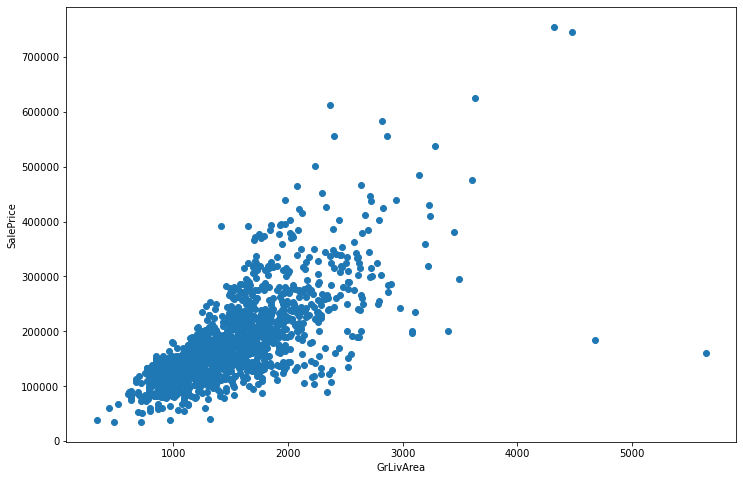

In [325]:
hist_scatter('GrLivArea', 'Above grade (ground) living area square feet')

In [326]:
train_data['GrLivArea'].corr(train_data['SalePrice'])

0.7086244776126522

We have two outliers - huge houses which costs cheap

In [327]:
train_data['GrLivArea'].sort_values(ascending=False).head()

1298    5642
523     4676
1182    4476
691     4316
1169    3627
Name: GrLivArea, dtype: int64

In [328]:
outliers_ind.extend(train_data['GrLivArea'].sort_values(ascending=False).head(2).index.to_list())

### BsmtFullBath

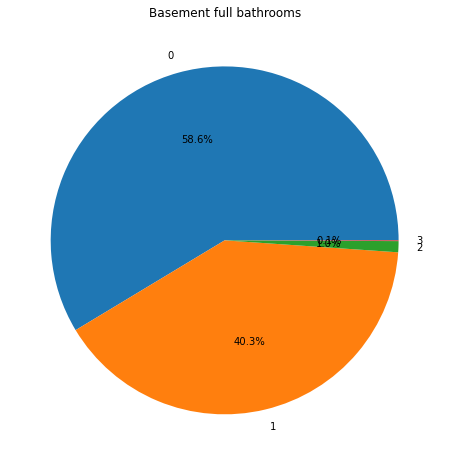

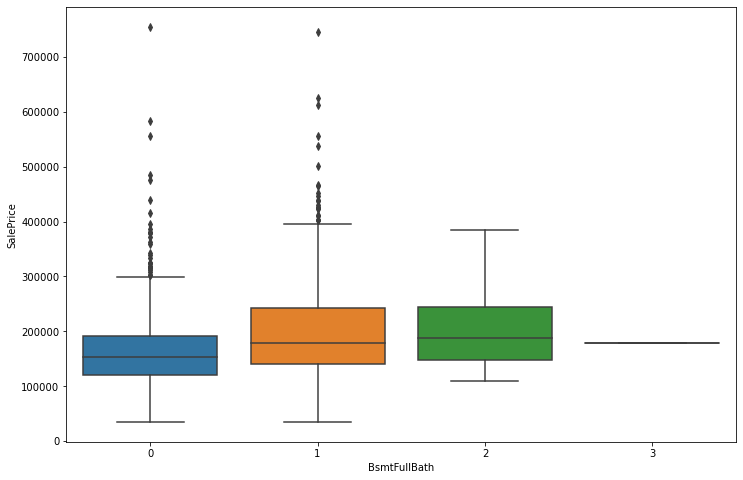

In [329]:
pie_box('BsmtFullBath', 'Basement full bathrooms')

In [330]:
test_data[test_data['BsmtFullBath'].isna()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
660  2121          20       RM         99.0     5940   Pave    NA      IR1   
728  2189          20       RL        123.0    47007   Pave    NA      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
660         Lvl    AllPub       FR3       Gtl      BrkSide      Feedr   
728         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
660       Norm     1Fam     1Story            4            7       1946   
728       Norm     1Fam     1Story            5            7       1959   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
660          1950     Gable  CompShg     MetalSd      CBlock       None   
728          1996     Gable  CompShg     Plywood     Plywood       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
660         0.0        TA        TA      PConc       NA       NA           NA   
728         0.0        TA        TA       Slab       NA       NA           NA   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
660           NA         0.0           NA         0.0        0.0          0.0   
728           NA         0.0           NA         0.0        0.0          0.0   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
660    GasA        TA          Y      FuseA       896         0             0   
728    GasA        TA          Y      SBrkr      3820         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
660        896           NaN           NaN         1         0             2   
728       3820           NaN           NaN         3         1             5   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
660             1          TA             4        Typ           0   
728             1          Ex            11        Typ           2   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
660         NaN     Detchd       1946.0          Unf         1.0       280.0   
728          Gd     Attchd       1959.0          Unf         2.0       624.0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
660         TA         TA          Y           0            0              0   
728         TA         TA          Y           0          372              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  \
660          0            0         0    NaN  MnPrv         NaN        0   
728          0            0         0    NaN    NaN         NaN        0   

     MoSold  YrSold SaleType SaleCondition  
660       4    2008    ConLD       Abnorml  
728       7    2008       WD        Normal

There is no basement in this two houses, so there are no basement baths too.

In [331]:
for dataset in combine:
    dataset['BsmtFullBath'] = dataset['BsmtFullBath'].fillna(0)

### BsmtHalfBath

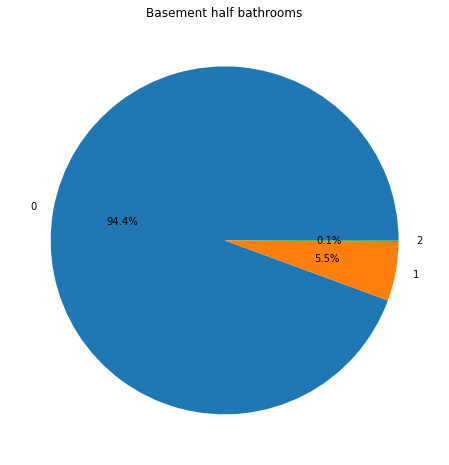

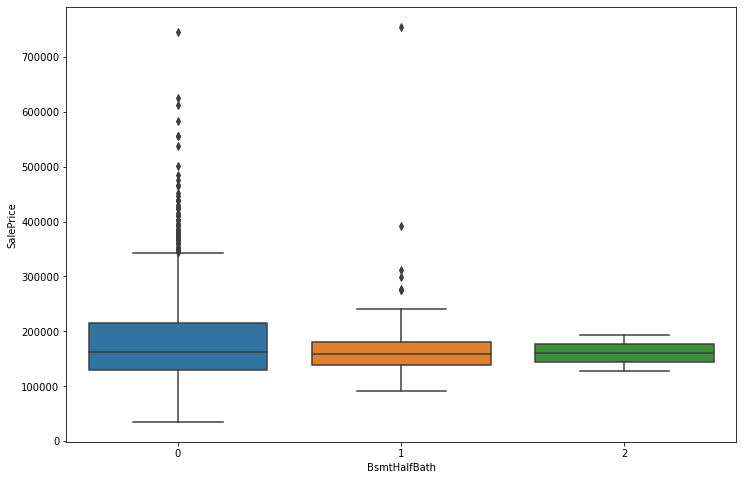

In [332]:
pie_box('BsmtHalfBath', 'Basement half bathrooms')

In [333]:
for dataset in combine:
    dataset['BsmtHalfBath'] = dataset['BsmtHalfBath'].fillna(0)

### FullBath

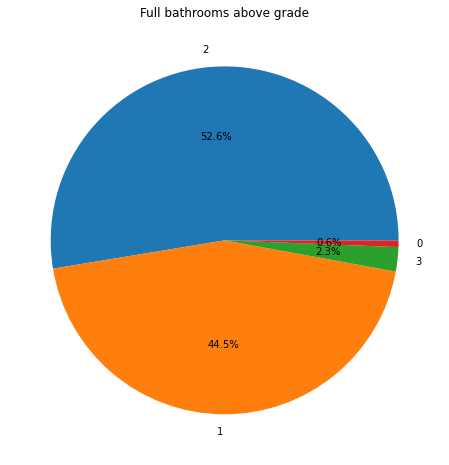

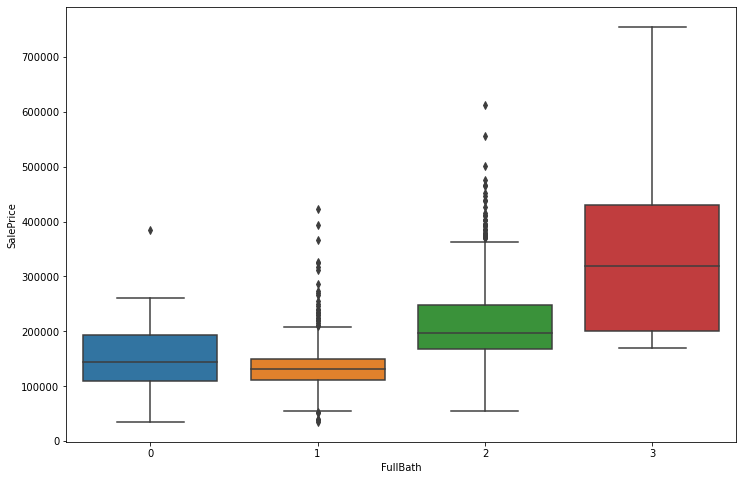

In [334]:
pie_box('FullBath', 'Full bathrooms above grade')

### HalfBath

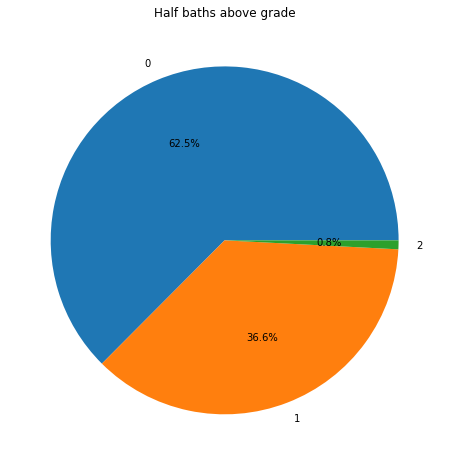

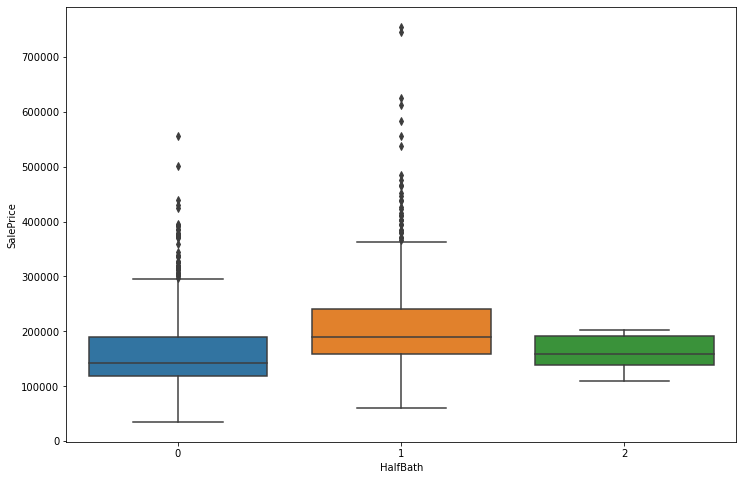

In [335]:
pie_box('HalfBath', 'Half baths above grade')

### BedroomAbvGr

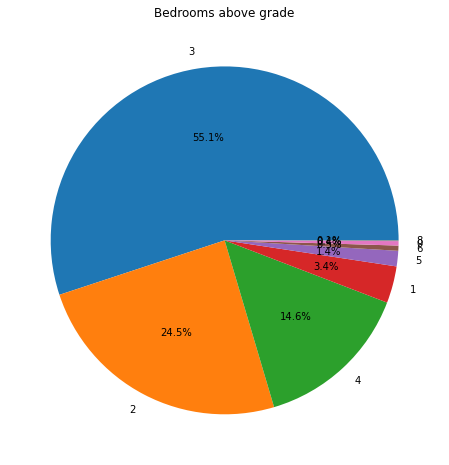

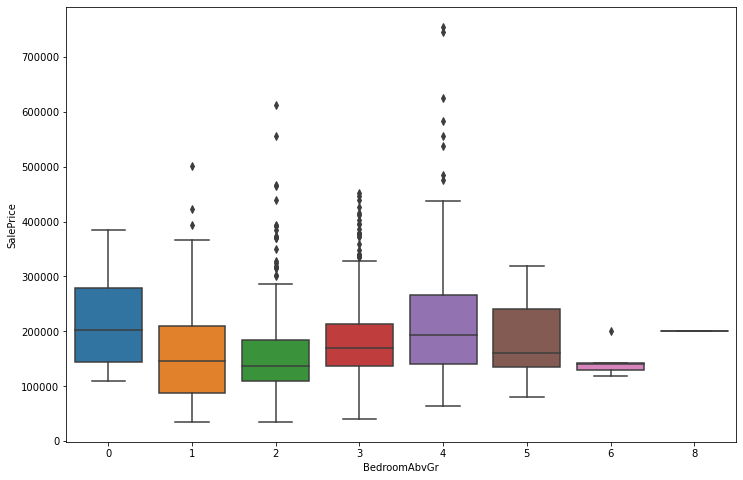

In [336]:
pie_box('BedroomAbvGr', 'Bedrooms above grade')

### KitchenAbvGr

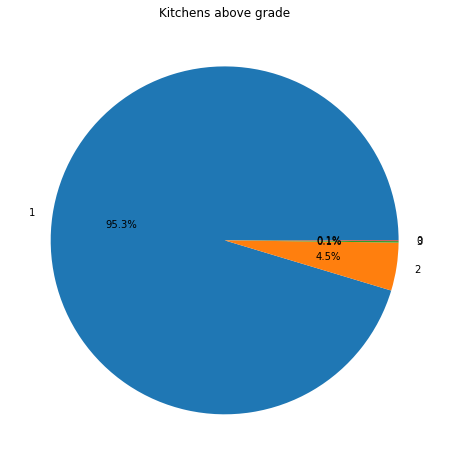

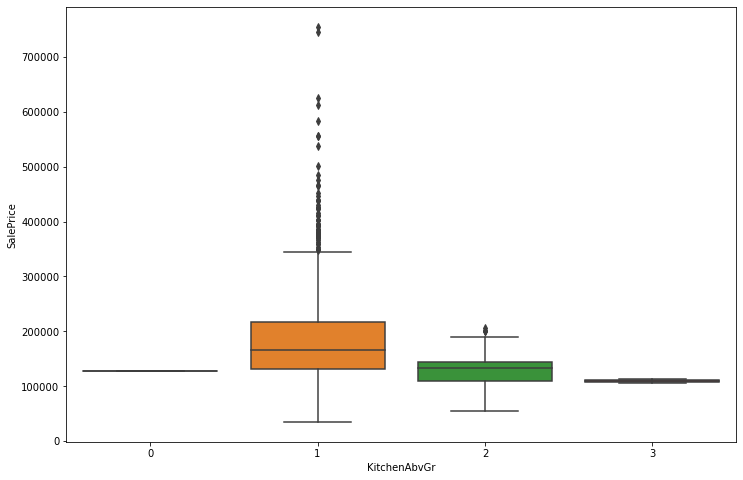

In [337]:
pie_box('KitchenAbvGr', 'Kitchens above grade')

### KitchenQual

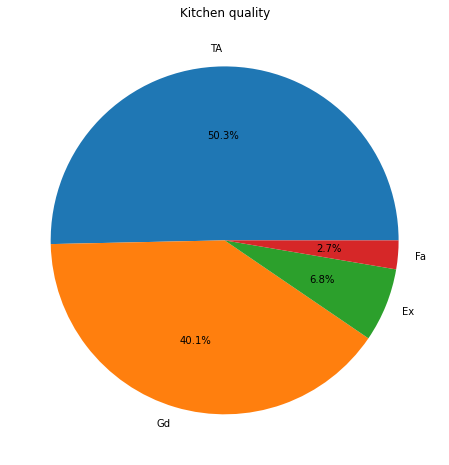

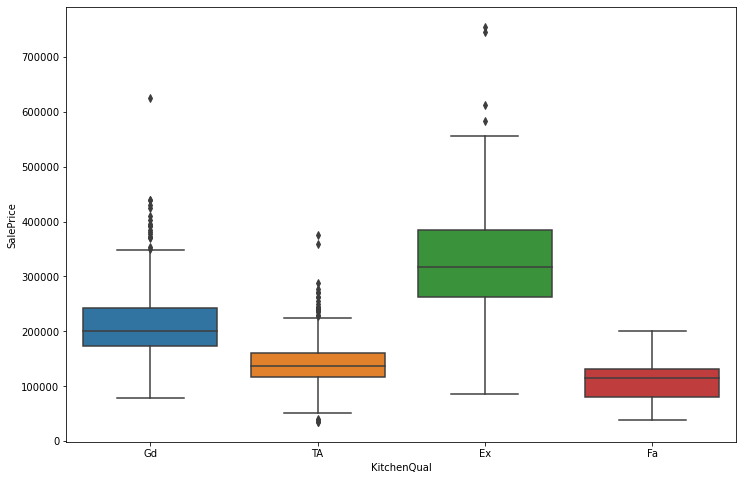

In [338]:
pie_box('KitchenQual', 'Kitchen quality')

In [339]:
for dataset in combine:
    dataset['KitchenQual'] = dataset['KitchenQual'].fillna(dataset['KitchenQual'].mode()[0])

### TotRmsAbvGrd

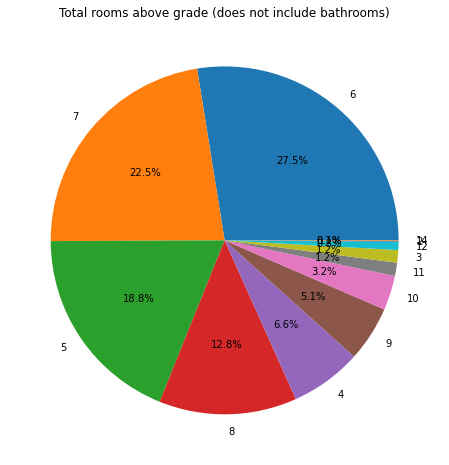

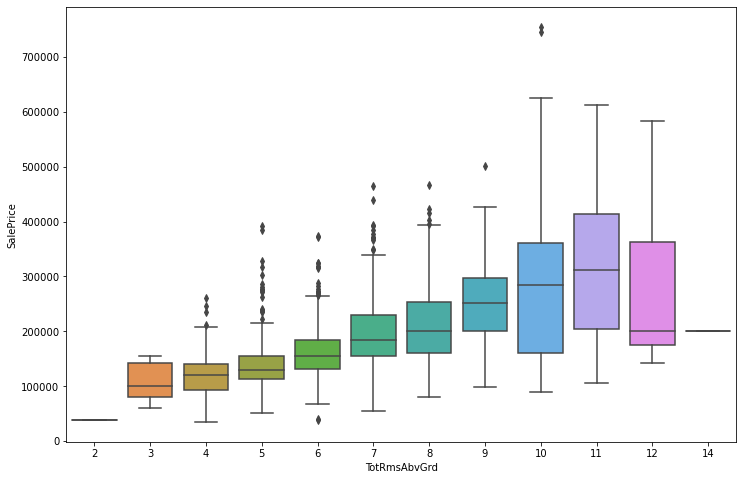

In [340]:
pie_box('TotRmsAbvGrd', 'Total rooms above grade (does not include bathrooms)')

Maybe it just correlates with the total area?

### Functional

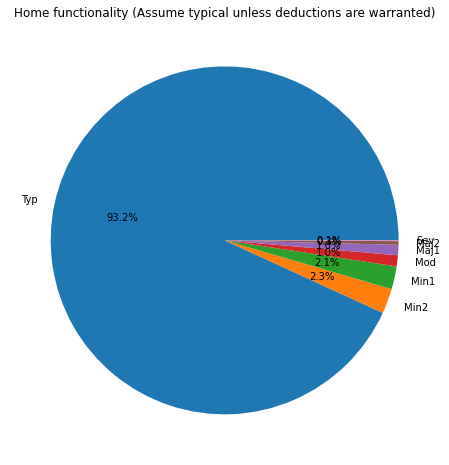

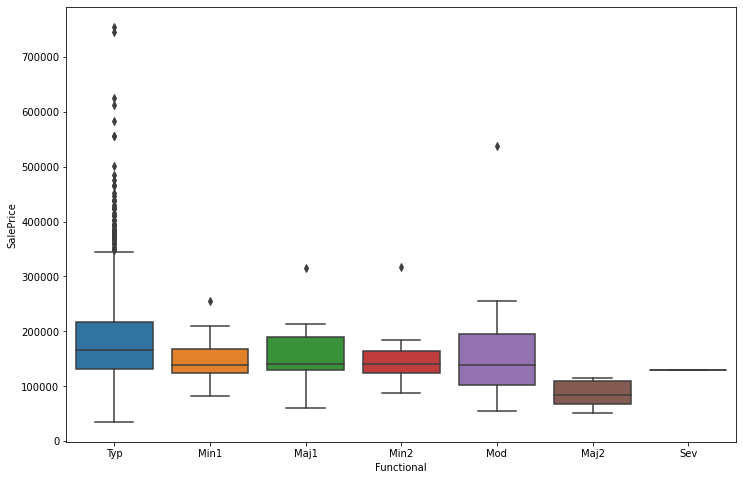

In [341]:
pie_box('Functional', 'Home functionality (Assume typical unless deductions are warranted)')

In [342]:
for dataset in combine:
    dataset['Functional'] = dataset['Functional'].fillna(dataset['Functional'].mode()[0])

### Fireplaces

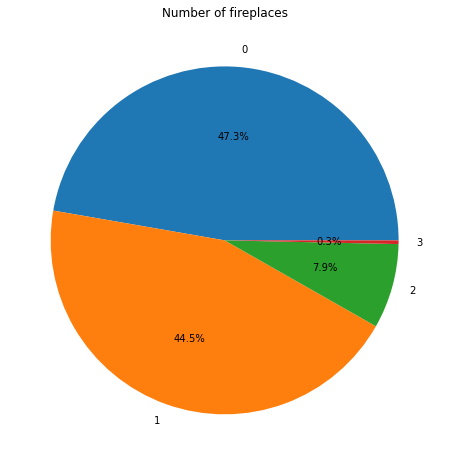

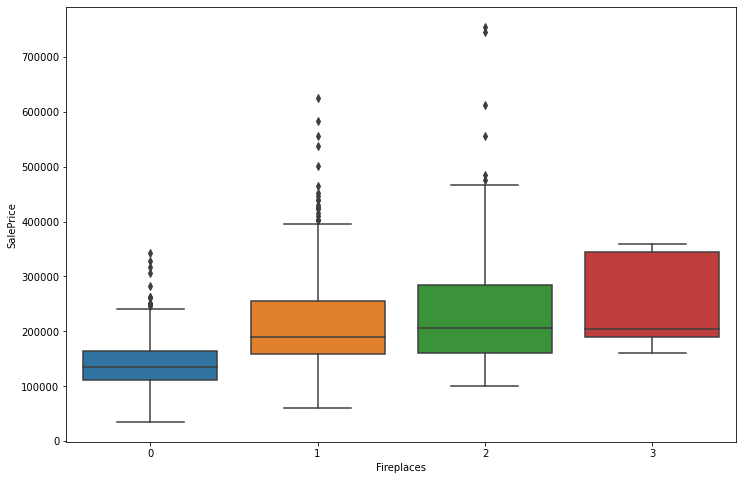

In [343]:
pie_box('Fireplaces', 'Number of fireplaces')

In [344]:
train_data[train_data['Fireplaces'] == 0]['Id'].count()

690

### FireplaceQu

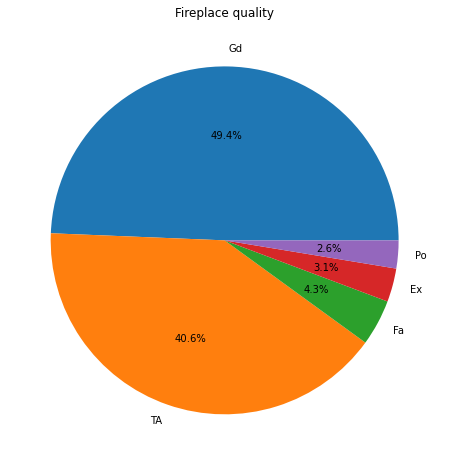

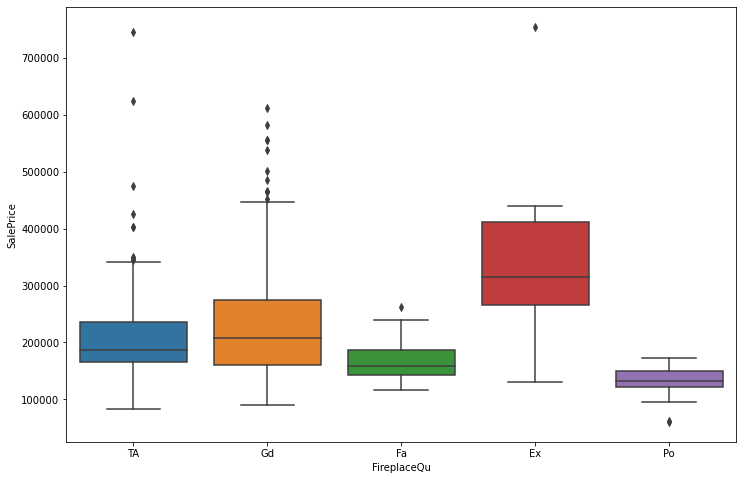

In [345]:
pie_box('FireplaceQu', 'Fireplace quality')

In [346]:
for dataset in combine:
    dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna('NA')

### GarageType

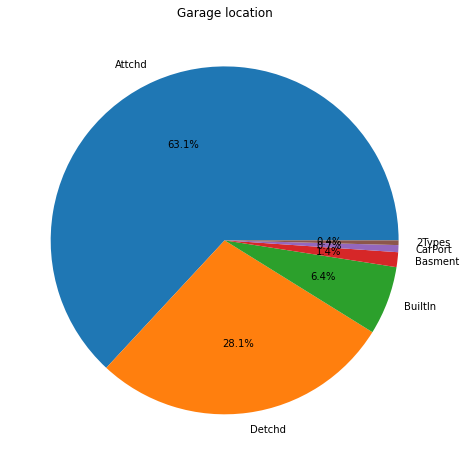

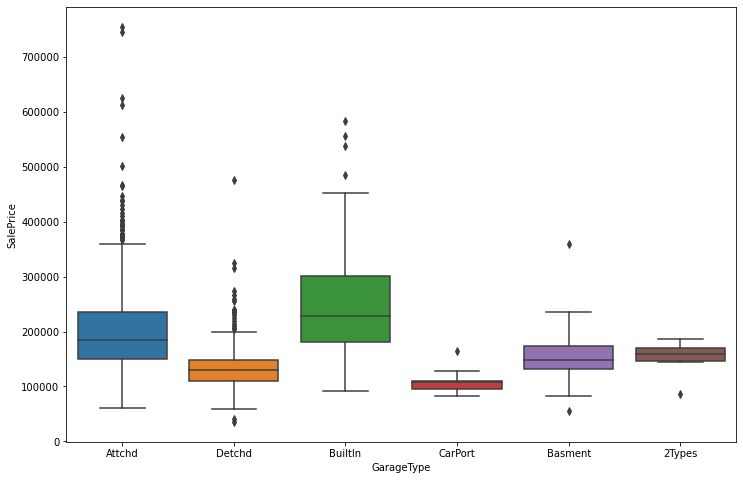

In [347]:
pie_box('GarageType', 'Garage location')

In [348]:
for dataset in combine:
    dataset['GarageType'] = dataset['GarageType'].fillna('NA')

### GarageYrBlt

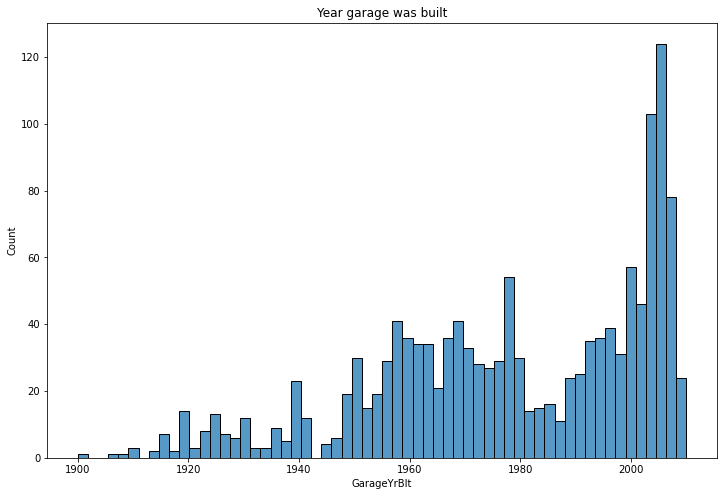

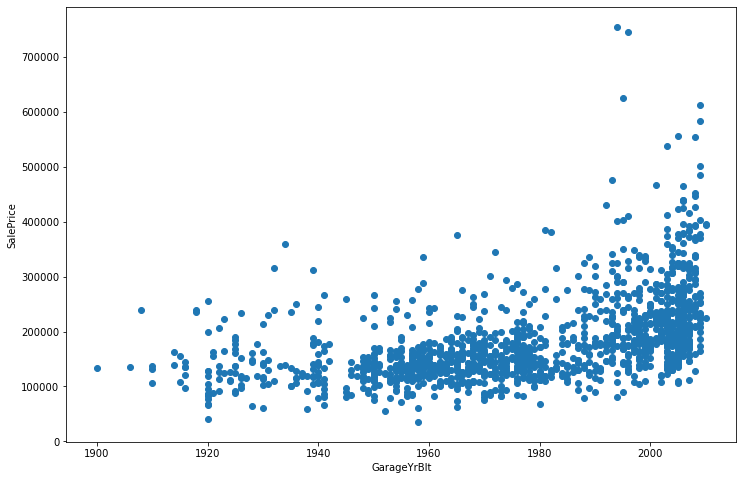

In [349]:
hist_scatter('GarageYrBlt', 'Year garage was built')

In [350]:
for dataset in combine:
    dataset['GarageYrBlt'] = dataset['GarageYrBlt'].fillna(dataset['YearBuilt'])

Corr with the house?

###  GarageFinish

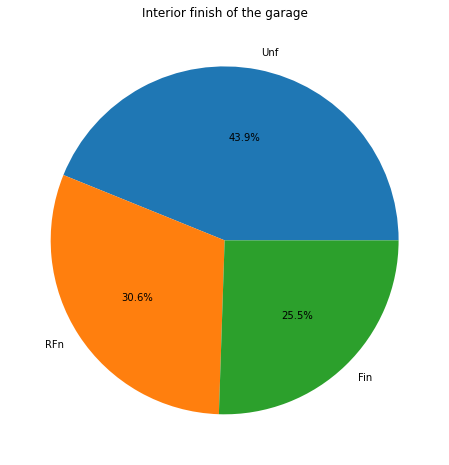

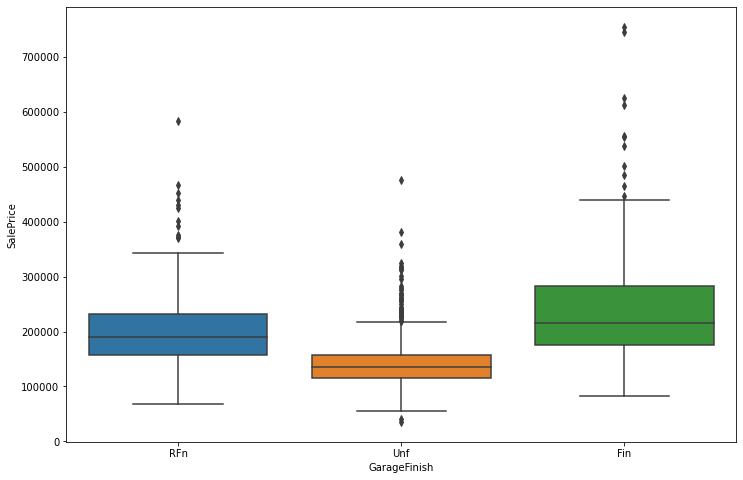

In [351]:
pie_box('GarageFinish', 'Interior finish of the garage')

In [352]:
for dataset in combine:
    dataset['GarageFinish'] = dataset['GarageFinish'].fillna('NA')

### GarageCars

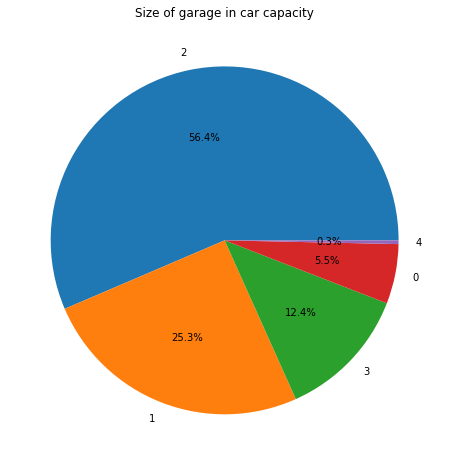

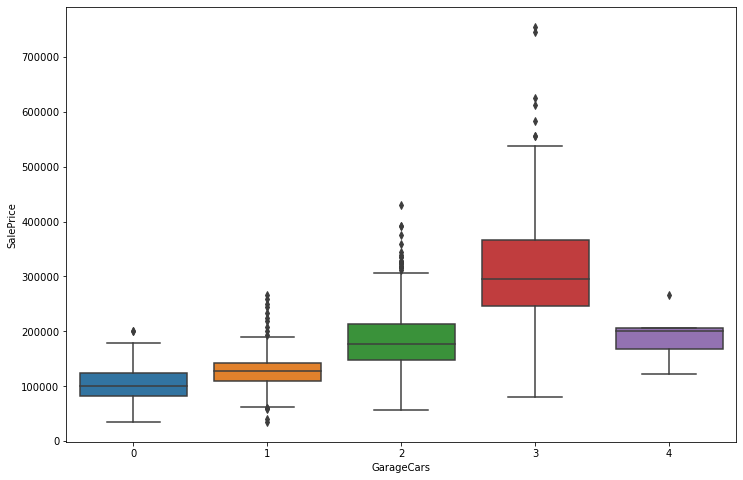

In [353]:
pie_box('GarageCars', 'Size of garage in car capacity')

In [354]:
for dataset in combine:
    dataset['GarageCars'] = dataset['GarageCars'].fillna(0)

### GarageArea

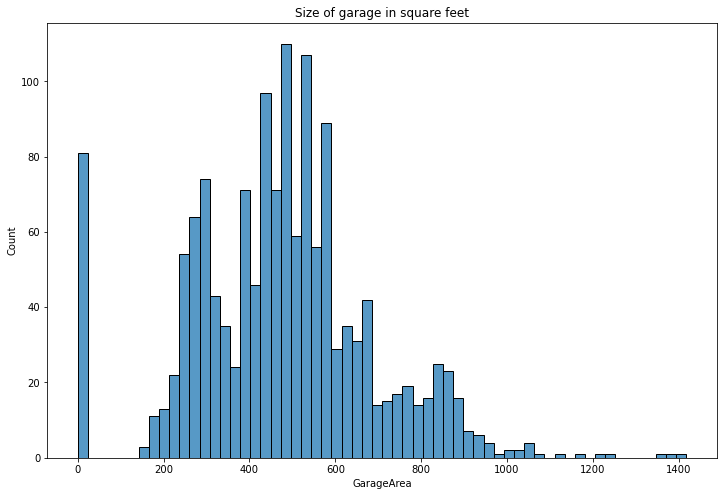

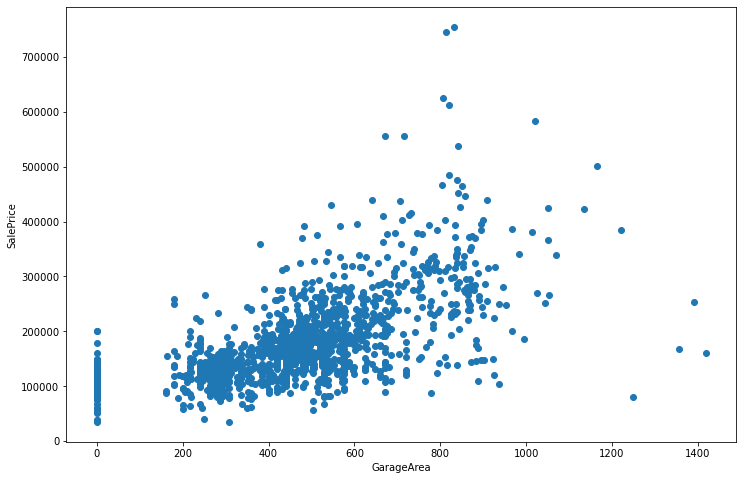

In [355]:
hist_scatter('GarageArea', 'Size of garage in square feet')

In [356]:
for dataset in combine:
    dataset['GarageArea'] = dataset['GarageArea'].fillna(0)

### GarageQual

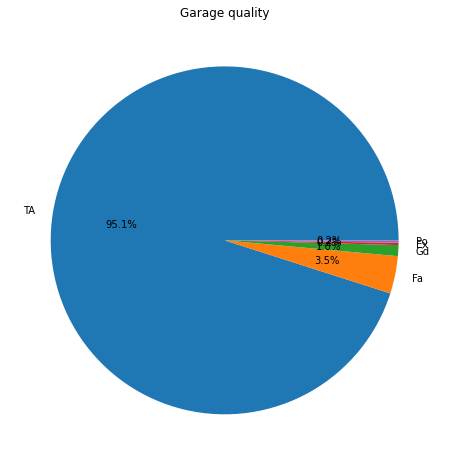

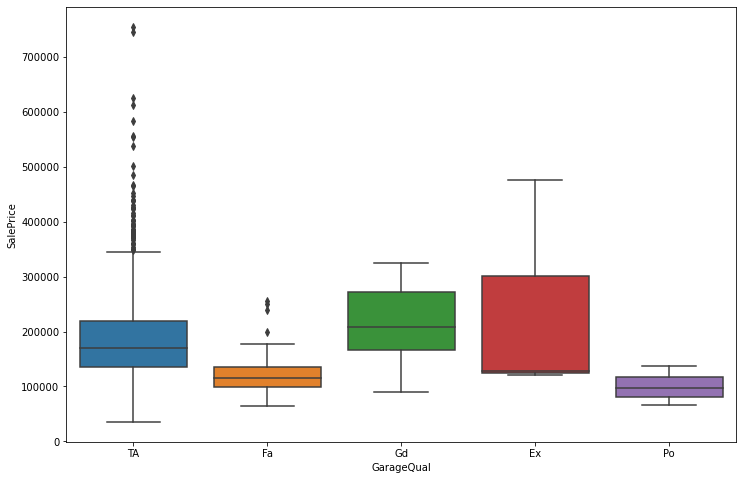

In [357]:
pie_box('GarageQual', 'Garage quality')

In [358]:
for dataset in combine:
    dataset['GarageQual'] = dataset['GarageQual'].fillna('NA')

### GarageCond

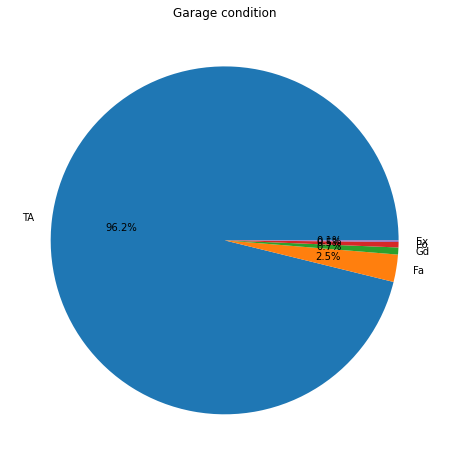

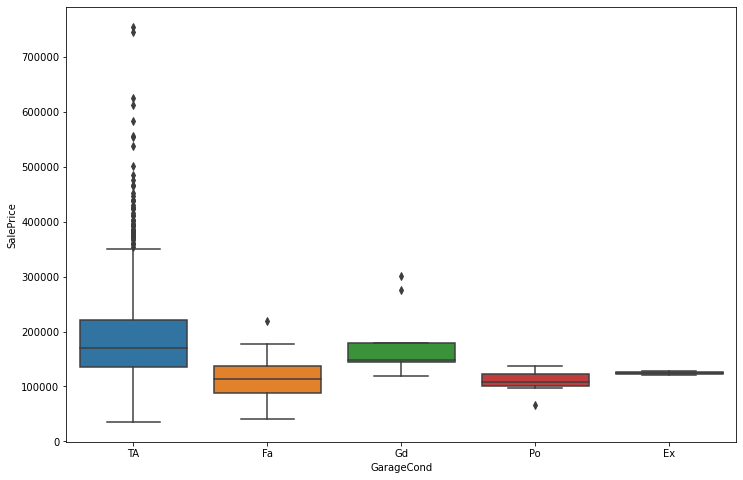

In [359]:
pie_box('GarageCond', 'Garage condition')

In [360]:
for dataset in combine:
    dataset['GarageCond'] = dataset['GarageCond'].fillna('NA')

### PavedDrive

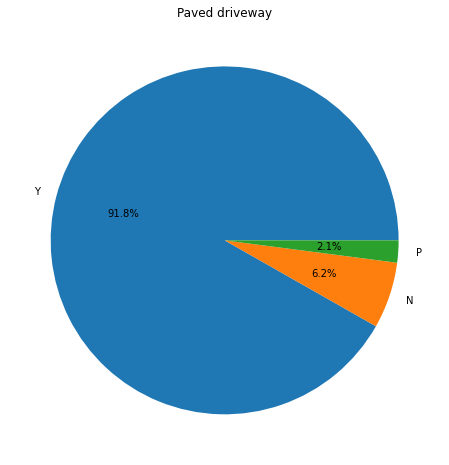

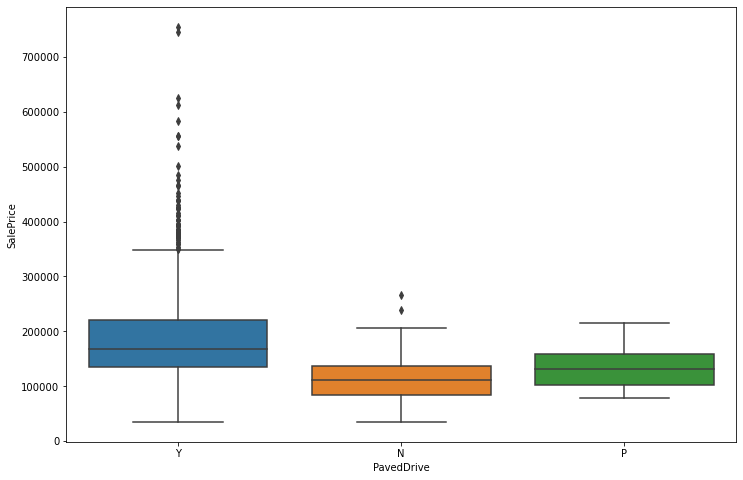

In [361]:
pie_box('PavedDrive', 'Paved driveway')

### WoodDeckSF

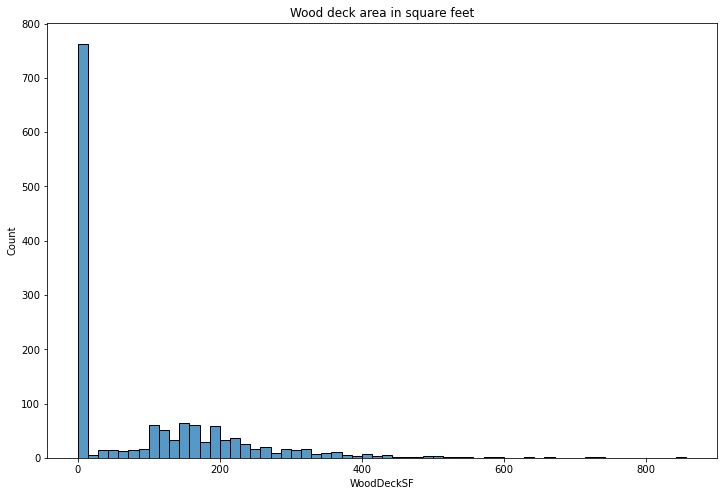

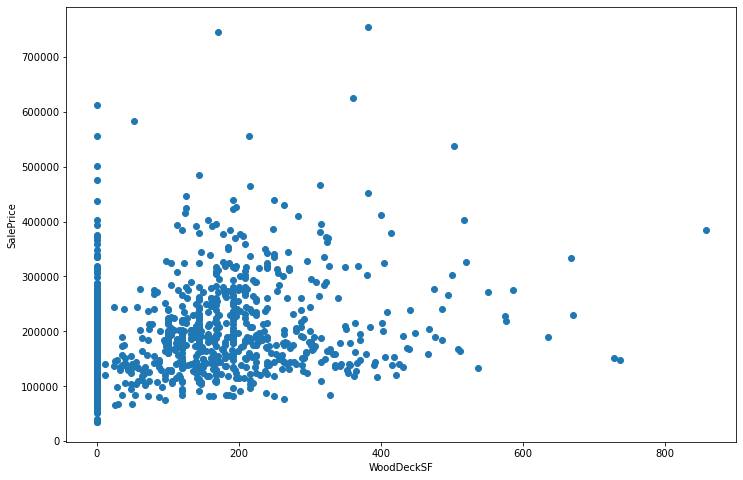

In [362]:
hist_scatter('WoodDeckSF', 'Wood deck area in square feet')

### OpenPorchSF

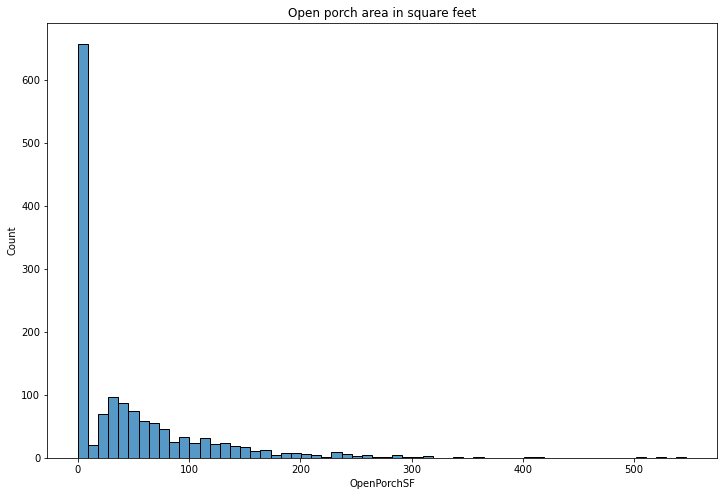

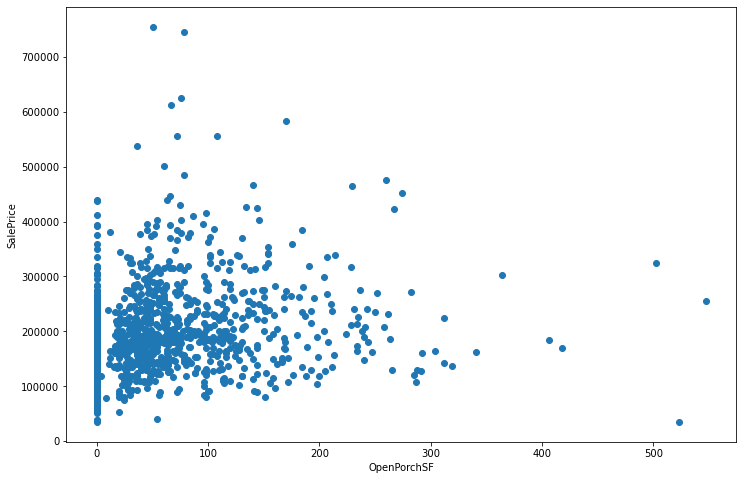

In [363]:
hist_scatter('OpenPorchSF', 'Open porch area in square feet')

### EnclosedPorch

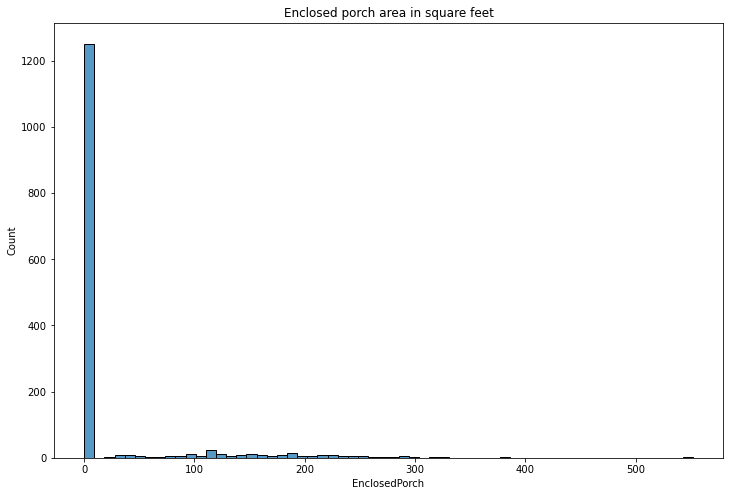

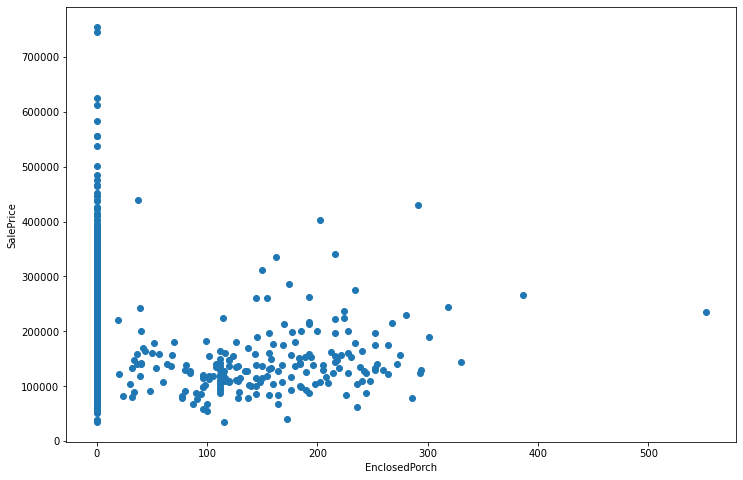

In [364]:
hist_scatter('EnclosedPorch', 'Enclosed porch area in square feet')

### 3SsnPorch

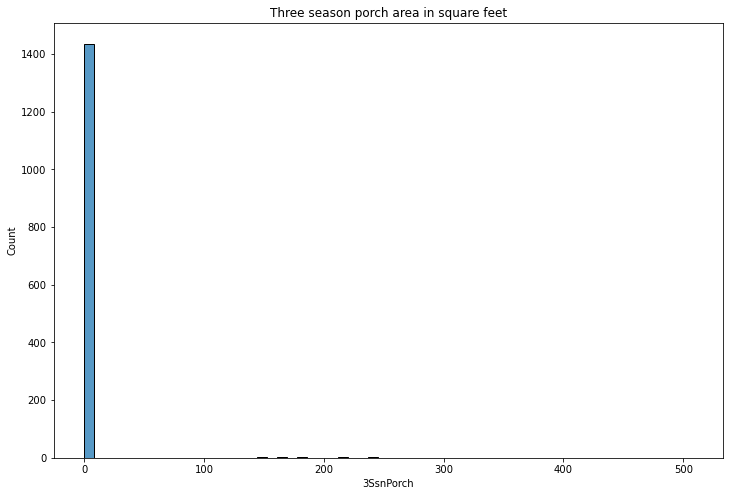

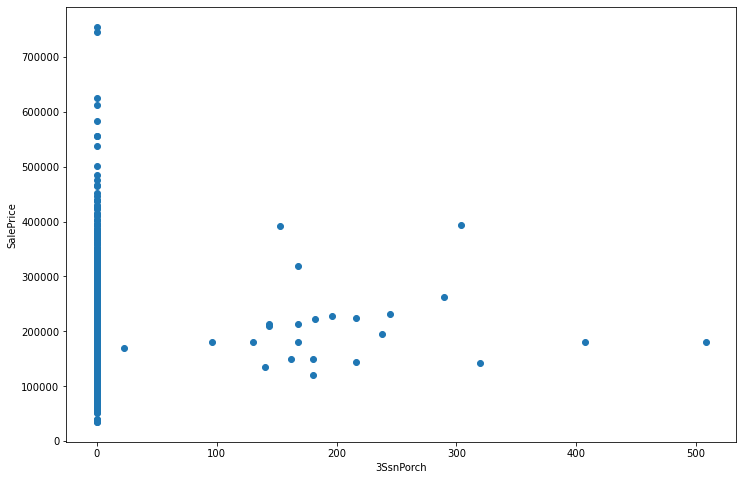

In [365]:
hist_scatter('3SsnPorch', 'Three season porch area in square feet')

### ScreenPorch

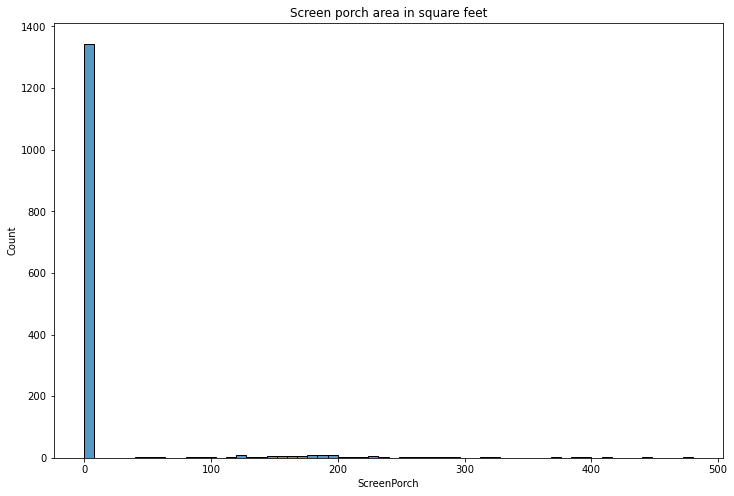

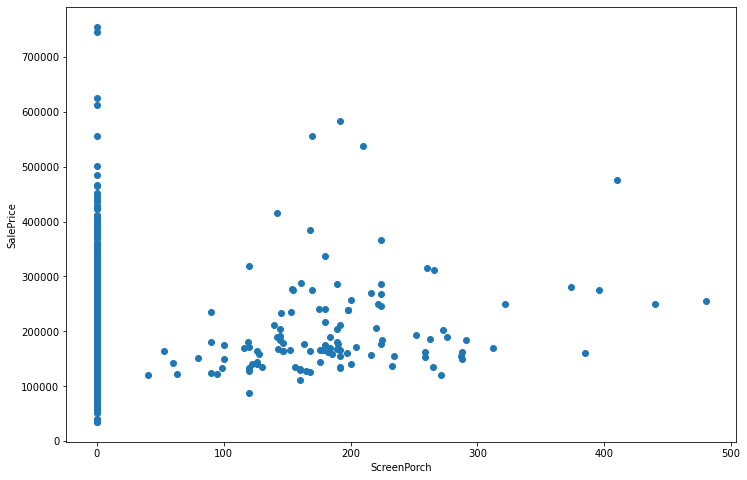

In [366]:
hist_scatter('ScreenPorch', 'Screen porch area in square feet')

### PoolArea

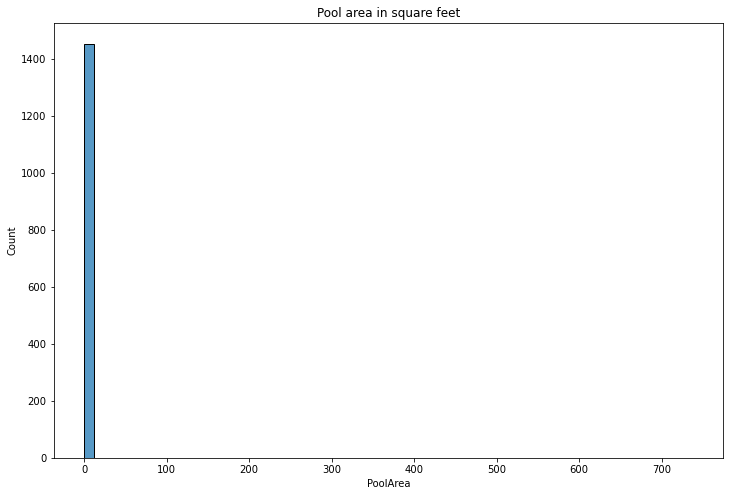

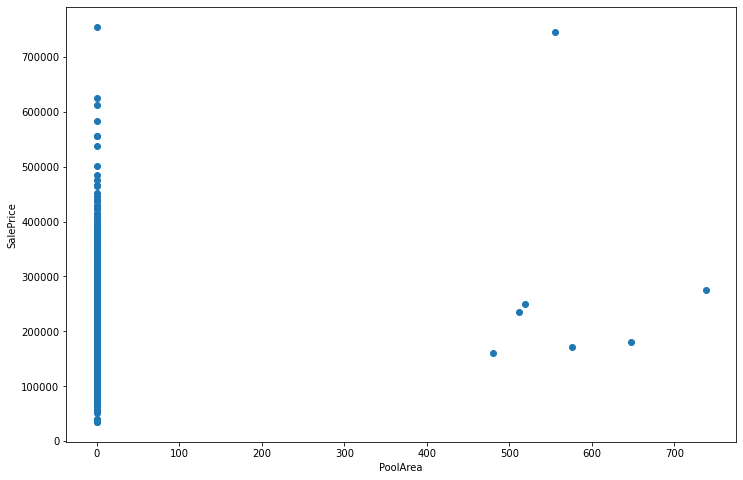

In [367]:
hist_scatter('PoolArea', 'Pool area in square feet')

### PoolQC

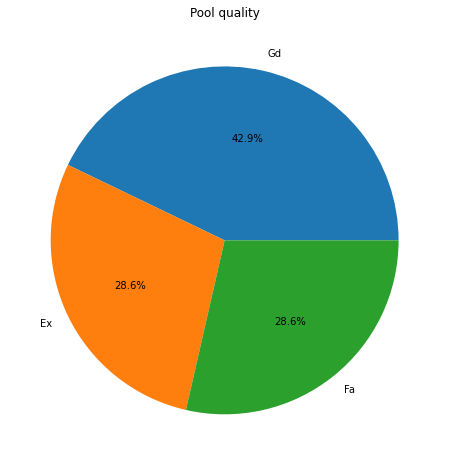

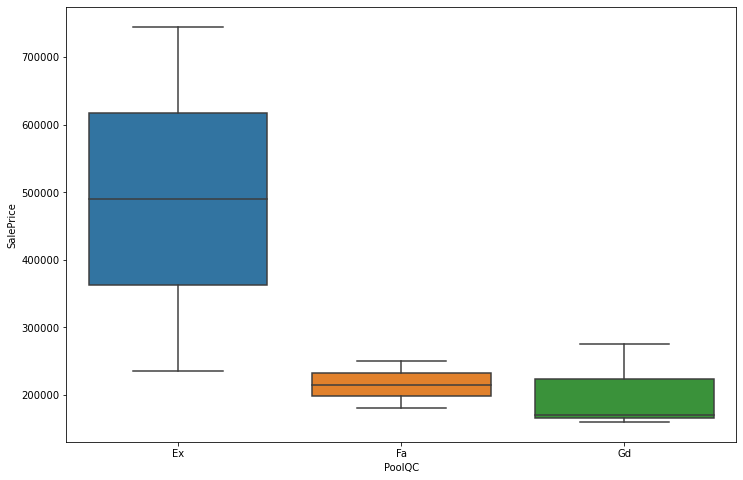

In [368]:
pie_box('PoolQC', 'Pool quality')

In [369]:
for dataset in combine:
    dataset.loc[dataset['PoolArea'] == 0, 'PoolQC'] = 'NA'
    dataset['PoolQC'] = dataset['PoolQC'].fillna(dataset['PoolQC'].mode()[0])

### Fence

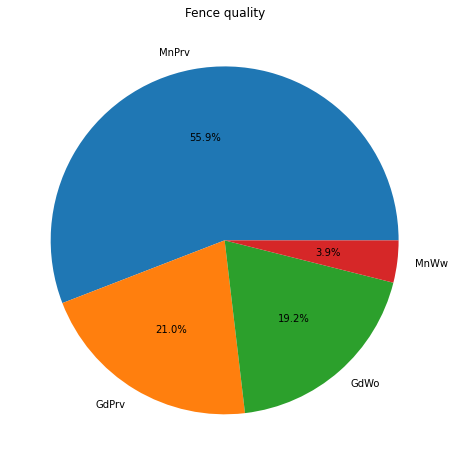

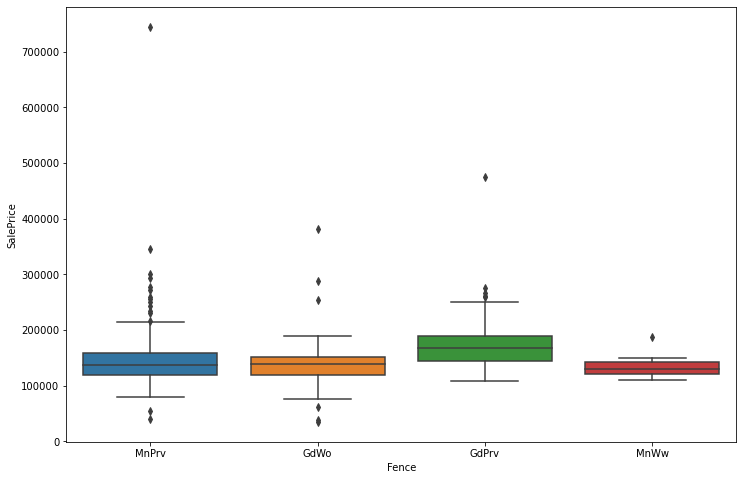

In [370]:
pie_box('Fence', 'Fence quality')

In [371]:
for dataset in combine:
    dataset['Fence'] = dataset['Fence'].fillna('NA')

### MiscFeature

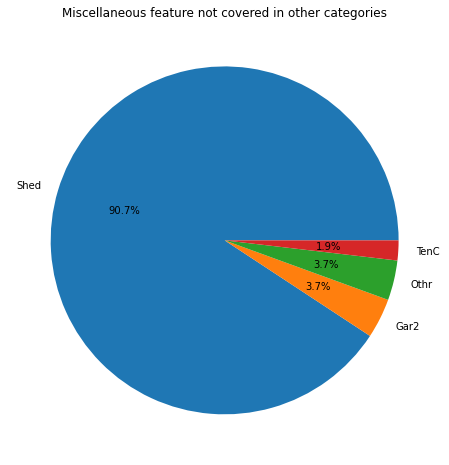

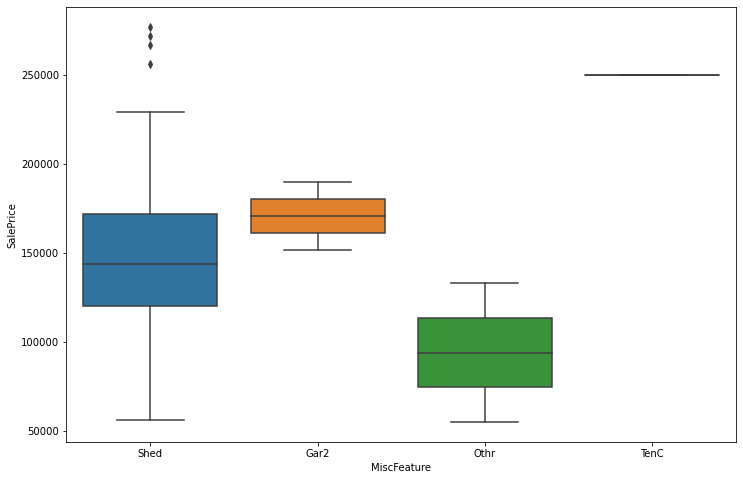

In [372]:
pie_box('MiscFeature', 'Miscellaneous feature not covered in other categories')

In [373]:
for dataset in combine:
    dataset['MiscFeature'] = dataset['MiscFeature'].fillna('NA')

### MiscVal

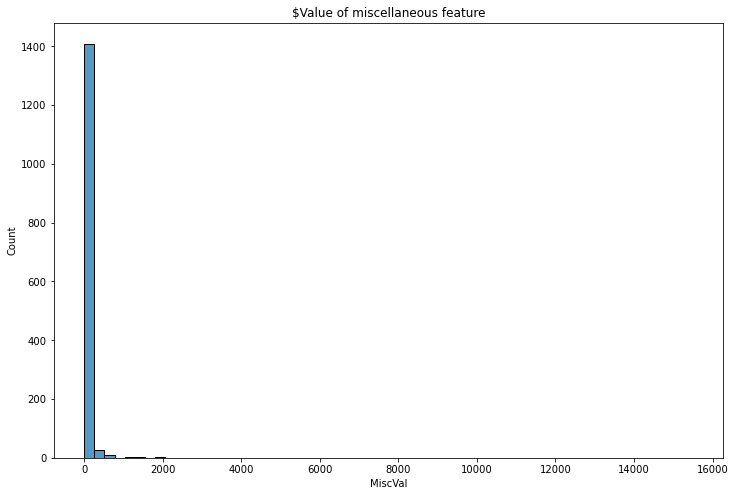

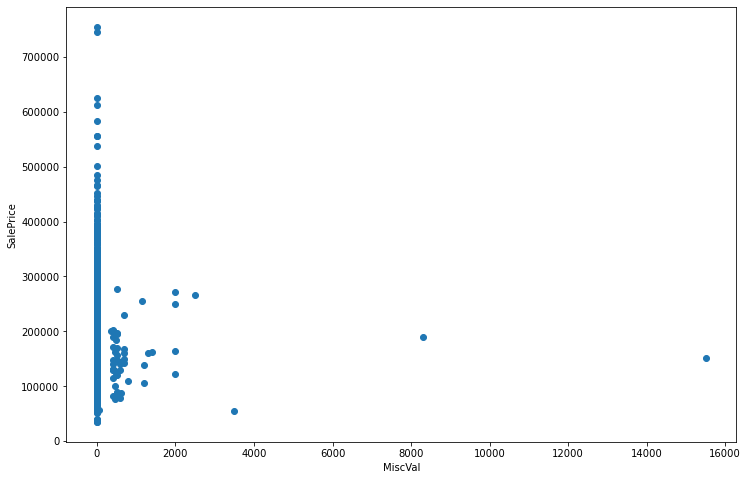

In [374]:
hist_scatter('MiscVal', '$Value of miscellaneous feature')

In [375]:
for dataset in combine:
    dataset['MiscVal'] = dataset['MiscVal'].fillna(0)

### MoSold

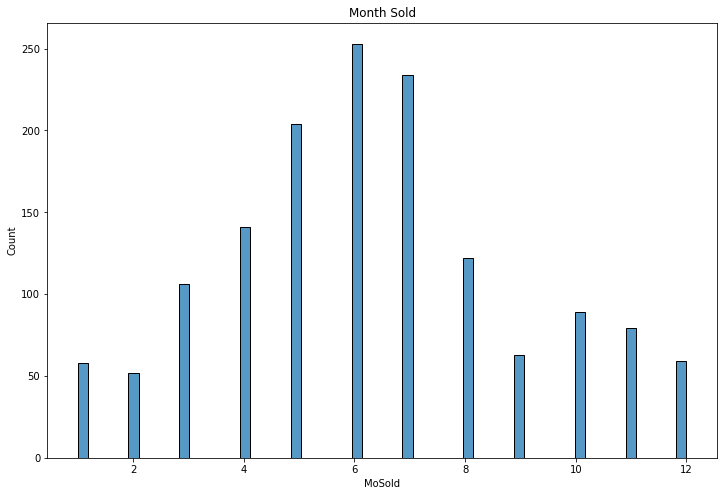

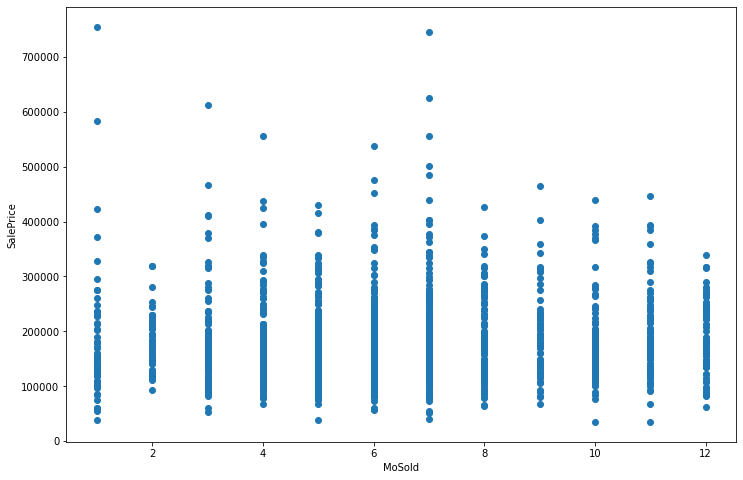

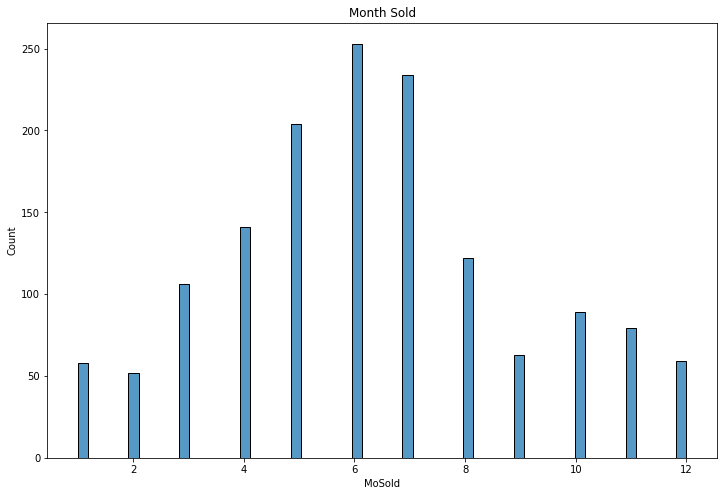

In [376]:
hist_scatter('MoSold', 'Month Sold')
sns.histplot(train_data['MoSold'], bins=60)
plt.title('Month Sold')
plt.show()

### YrSold

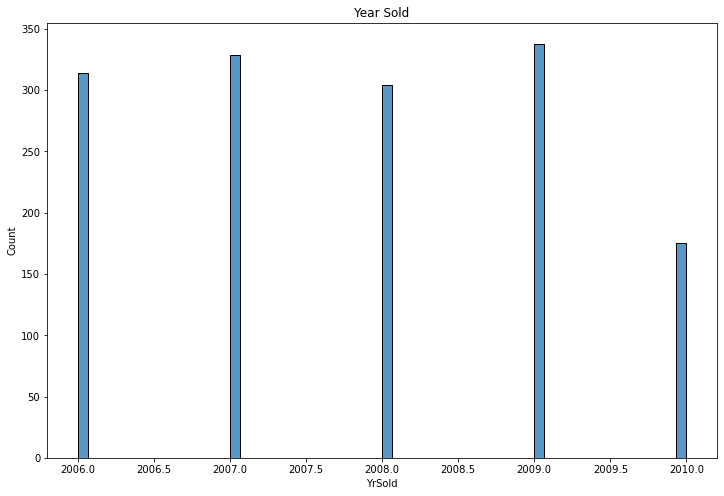

In [377]:
sns.histplot(train_data['YrSold'], bins=60)
plt.title('Year Sold')
plt.show()

### SaleType

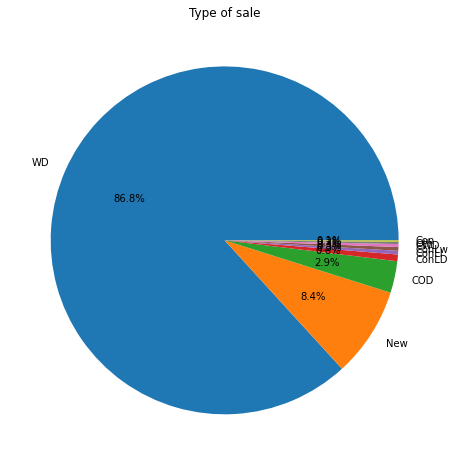

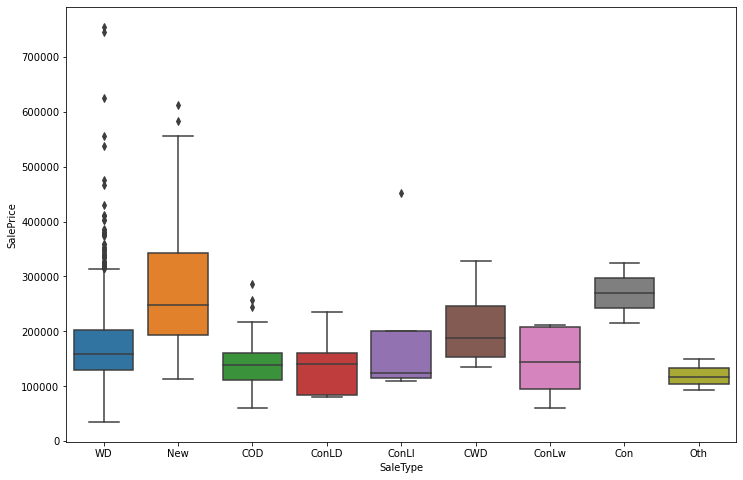

In [378]:
pie_box('SaleType', 'Type of sale')

In [379]:
for dataset in combine:
    dataset['SaleType'] = dataset['SaleType'].fillna(dataset['SaleType'].mode()[0])

### SaleCondition

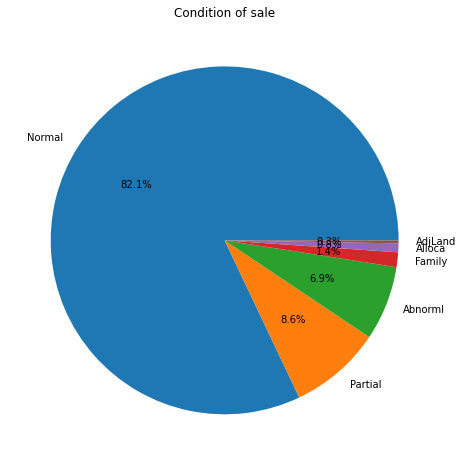

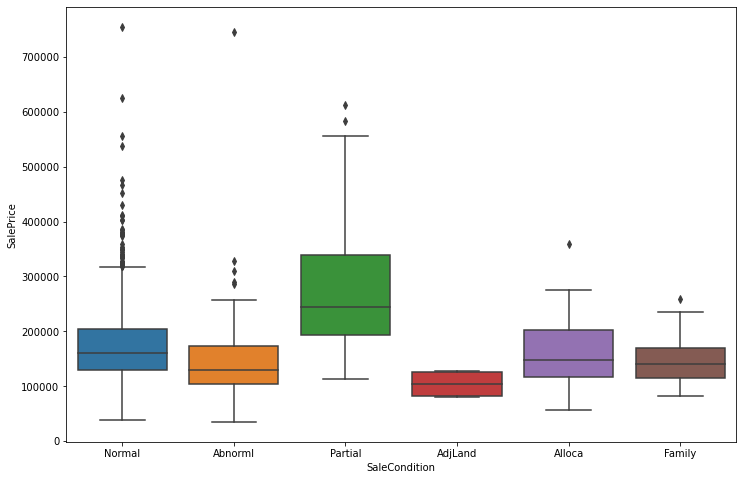

In [380]:
pie_box('SaleCondition', 'Condition of sale')

## Preparing Samples

In [381]:
test_index = test_data['Id']

In [382]:
for dataset in combine:
    dataset.drop(['Id'], axis=1, inplace=True)

In [383]:
cols_to_cast = []
for col in train_data.drop('SalePrice', axis=1).columns:
    if train_data[col].dtype != test_data[col].dtype:
        print(col)
        print(train_data[col].dtype)
        print(test_data[col].dtype)
        print()

TotalBsmtSF
int64
float64

BsmtFullBath
int64
float64

BsmtHalfBath
int64
float64

GarageCars
int64
float64

GarageArea
int64
float64



In [384]:
for col in cols_to_cast:
    test_data[col] = test_data[col].astype('int')

### Encoding

Categorical into numerical.

In [385]:
qual_col = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
            'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
bsmt = ['BsmtFinType1', 'BsmtFinType2']

In [386]:
for dataset in combine:
    dataset[qual_col] = dataset[qual_col].replace({'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
    dataset[bsmt] = dataset[bsmt].replace({"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6})

Numerical which are actually categorical.

In [387]:
for dataset in combine:
    dataset = dataset.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

### Combine

#### GrvlAccs

In [388]:
for dataset in combine:
    dataset['GrvlAccs'] = dataset['Alley'].copy()
    dataset.loc[dataset['Alley'] == 'NA', 'GrvlAccs'] = dataset['Street']

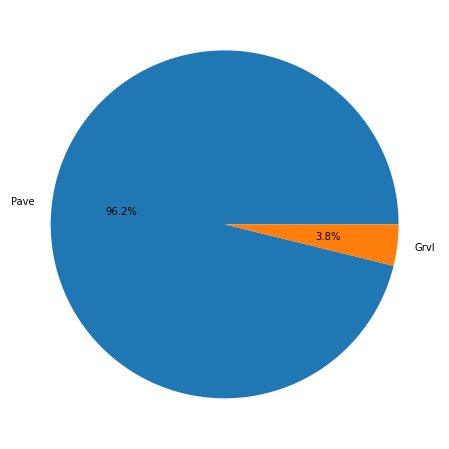

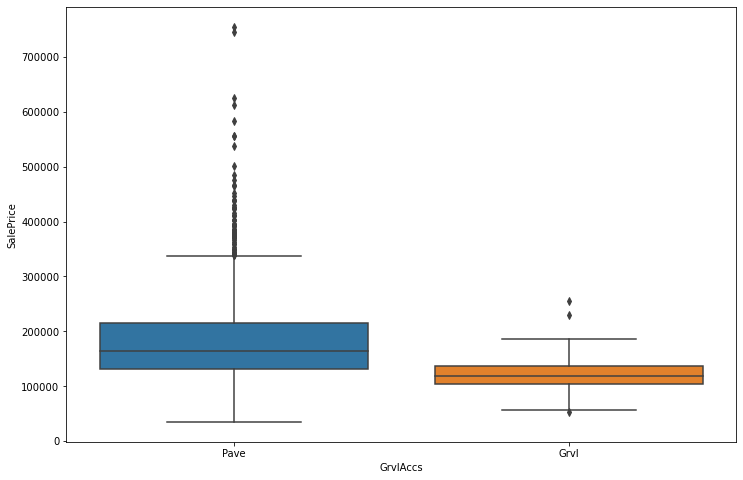

In [389]:
pie_box('GrvlAccs', '')

#### Porch

In [390]:
for dataset in combine:
    dataset['Porch'] = dataset['WoodDeckSF'] + dataset['OpenPorchSF'] + \
        dataset['EnclosedPorch'] + \
        dataset['3SsnPorch'] + dataset['ScreenPorch']

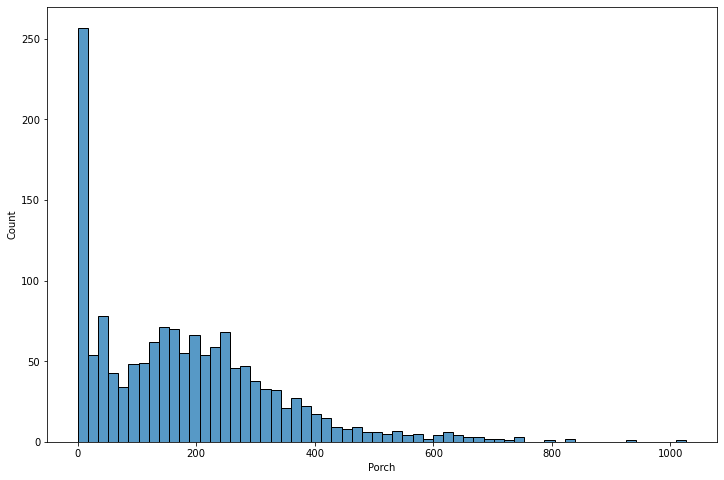

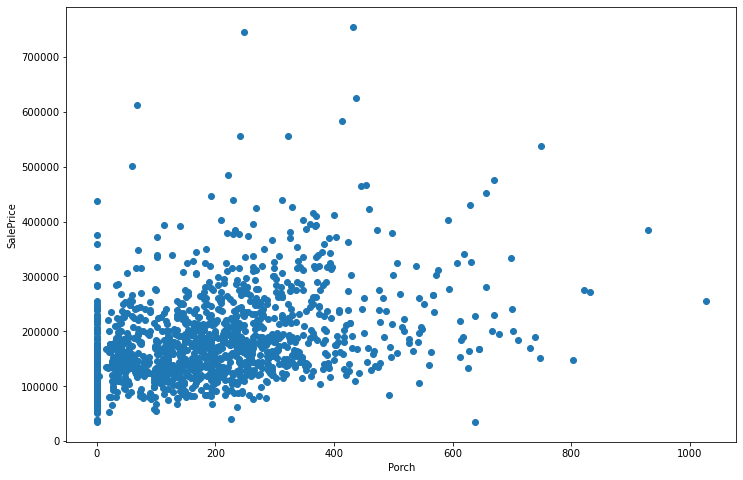

In [391]:
hist_scatter('Porch', '')

#### All bath

In [392]:
for dataset in combine:
    dataset['AllBath'] = dataset['FullBath'] + dataset['BsmtFullBath'] + 0.5*dataset['HalfBath'] + 0.5*dataset['BsmtHalfBath']

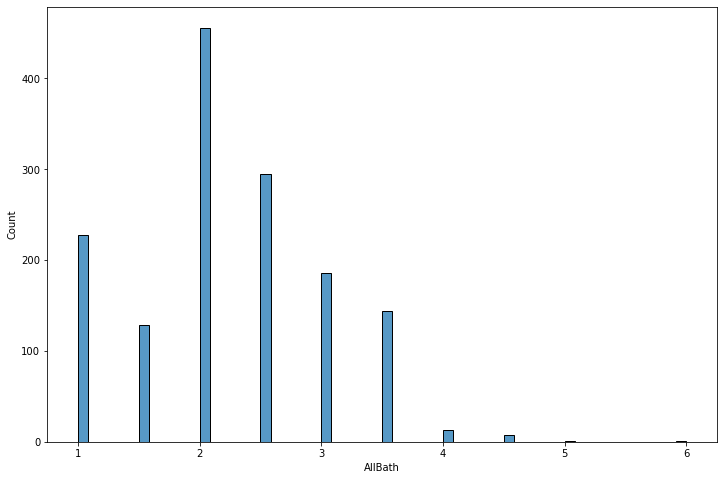

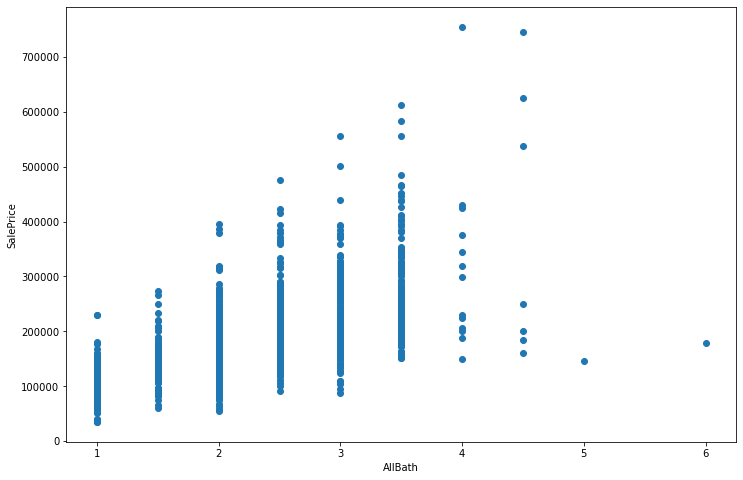

In [393]:
hist_scatter('AllBath', '')

In [394]:
combine = [train_data, test_data]
for dataset in combine:
    # Create new features
    # 1* Simplifications of existing features
    dataset["SimplOverallQual"] = dataset.OverallQual.replace({1: 1, 2: 1, 3: 1,  # bad
                                                               4: 2, 5: 2, 6: 2,  # average
                                                               7: 3, 8: 3, 9: 3, 10: 3  # good
                                                               })
    dataset["SimplOverallCond"] = dataset.OverallCond.replace({1: 1, 2: 1, 3: 1,  # bad
                                                               4: 2, 5: 2, 6: 2,  # average
                                                               7: 3, 8: 3, 9: 3, 10: 3  # good
                                                               })
    dataset["SimplPoolQC"] = dataset.PoolQC.replace({1: 1, 2: 1,  # average
                                                     3: 2, 4: 2  # good
                                                     })
    dataset["SimplGarageCond"] = dataset.GarageCond.replace({1: 1,  # bad
                                                             2: 1, 3: 1,  # average
                                                             4: 2, 5: 2  # good
                                                             })
    dataset["SimplGarageQual"] = dataset.GarageQual.replace({1: 1,  # bad
                                                             2: 1, 3: 1,  # average
                                                             4: 2, 5: 2  # good
                                                             })
    dataset["SimplFireplaceQu"] = dataset.FireplaceQu.replace({1: 1,  # bad
                                                               2: 1, 3: 1,  # average
                                                               4: 2, 5: 2  # good
                                                               })
    dataset["SimplFireplaceQu"] = dataset.FireplaceQu.replace({1: 1,  # bad
                                                               2: 1, 3: 1,  # average
                                                               4: 2, 5: 2  # good
                                                               })
    dataset["SimplFunctional"] = dataset.Functional.replace({1: 1, 2: 1,  # bad
                                                             3: 2, 4: 2,  # major
                                                             5: 3, 6: 3, 7: 3,  # minor
                                                             8: 4  # typical
                                                             })
    dataset["SimplKitchenQual"] = dataset.KitchenQual.replace({1: 1,  # bad
                                                               2: 1, 3: 1,  # average
                                                               4: 2, 5: 2  # good
                                                               })
    dataset["SimplHeatingQC"] = dataset.HeatingQC.replace({1: 1,  # bad
                                                           2: 1, 3: 1,  # average
                                                           4: 2, 5: 2  # good
                                                           })
    dataset["SimplBsmtFinType1"] = dataset.BsmtFinType1.replace({1: 1,  # unfinished
                                                                 2: 1, 3: 1,  # rec room
                                                                 4: 2, 5: 2, 6: 2  # living quarters
                                                                 })
    dataset["SimplBsmtFinType2"] = dataset.BsmtFinType2.replace({1: 1,  # unfinished
                                                                 2: 1, 3: 1,  # rec room
                                                                 4: 2, 5: 2, 6: 2  # living quarters
                                                                 })
    dataset["SimplBsmtCond"] = dataset.BsmtCond.replace({1: 1,  # bad
                                                         2: 1, 3: 1,  # average
                                                         4: 2, 5: 2  # good
                                                         })
    dataset["SimplBsmtQual"] = dataset.BsmtQual.replace({1: 1,  # bad
                                                         2: 1, 3: 1,  # average
                                                         4: 2, 5: 2  # good
                                                         })
    dataset["SimplExterCond"] = dataset.ExterCond.replace({1: 1,  # bad
                                                           2: 1, 3: 1,  # average
                                                           4: 2, 5: 2  # good
                                                           })
    dataset["SimplExterQual"] = dataset.ExterQual.replace({1: 1,  # bad
                                                           2: 1, 3: 1,  # average
                                                           4: 2, 5: 2  # good
                                                           })

    # 2* Combinations of existing features
    # Overall quality of the house
    dataset["OverallGrade"] = dataset["OverallQual"] * dataset["OverallCond"]
    # Overall quality of the garage
    dataset["GarageGrade"] = dataset["GarageQual"] * dataset["GarageCond"]
    # Overall quality of the exterior
    dataset["ExterGrade"] = dataset["ExterQual"] * dataset["ExterCond"]
    # Overall kitchen score
    dataset["KitchenScore"] = dataset["KitchenAbvGr"] * dataset["KitchenQual"]
    # Overall fireplace score
    dataset["FireplaceScore"] = dataset["Fireplaces"] * dataset["FireplaceQu"]
    # Overall garage score
    dataset["GarageScore"] = dataset["GarageArea"] * dataset["GarageQual"]
    # Overall pool score
    dataset["PoolScore"] = dataset["PoolArea"] * dataset["PoolQC"]
    # Simplified overall quality of the house
    dataset["SimplOverallGrade"] = dataset["SimplOverallQual"] * \
        dataset["SimplOverallCond"]
    # Simplified overall quality of the exterior
    dataset["SimplExterGrade"] = dataset["SimplExterQual"] * \
        dataset["SimplExterCond"]
    # Simplified overall pool score
    dataset["SimplPoolScore"] = dataset["PoolArea"] * dataset["SimplPoolQC"]
    # Simplified overall garage score
    dataset["SimplGarageScore"] = dataset["GarageArea"] * \
        dataset["SimplGarageQual"]
    # Simplified overall fireplace score
    dataset["SimplFireplaceScore"] = dataset["Fireplaces"] * \
        dataset["SimplFireplaceQu"]
    # Simplified overall kitchen score
    dataset["SimplKitchenScore"] = dataset["KitchenAbvGr"] * \
        dataset["SimplKitchenQual"]
    # Total number of bathrooms
    dataset["TotalBath"] = dataset["BsmtFullBath"] + (0.5 * dataset["BsmtHalfBath"]) + \
        dataset["FullBath"] + (0.5 * dataset["HalfBath"])
    # Total SF for house (incl. basement)
    dataset["AllSF"] = dataset["GrLivArea"] + dataset["TotalBsmtSF"]
    # Total SF for 1st + 2nd floors
    dataset["AllFlrsSF"] = dataset["1stFlrSF"] + dataset["2ndFlrSF"]
    # Has masonry veneer or not
    dataset["HasMasVnr"] = dataset.MasVnrType.replace({"BrkCmn": 1, "BrkFace": 1, "CBlock": 1,
                                                       "Stone": 1, "None": 0})
    # House completed before sale or not
    dataset["BoughtOffPlan"] = dataset.SaleCondition.replace({"Abnorml": 0, "Alloca": 0, "AdjLand": 0,
                                                              "Family": 0, "Normal": 0, "Partial": 1})

### Deleting

In [395]:
train_data = train_data.drop(set(outliers_ind), axis=0)

In [396]:
features = train_data.drop('SalePrice', axis=1)
target = train_data['SalePrice']

In [397]:
cat_cols = features.select_dtypes(include=["object"]).columns.to_list()

In [398]:
features_train, features_val, target_train, target_val = train_test_split(features, target, random_state=1)

In [399]:
cat = CatBoostRegressor(random_seed=42, loss_function='RMSE', verbose=100)

In [400]:
cat.fit(features_train, target_train, cat_features=cat_cols)

Learning rate set to 0.041498
0:	learn: 77828.5891782	total: 9.57ms	remaining: 9.56s
100:	learn: 21075.4527687	total: 956ms	remaining: 8.51s
200:	learn: 16791.0462161	total: 1.94s	remaining: 7.73s
300:	learn: 14721.7022247	total: 2.98s	remaining: 6.93s
400:	learn: 13505.3660294	total: 4.06s	remaining: 6.07s
500:	learn: 12241.2250926	total: 5.14s	remaining: 5.12s
600:	learn: 11064.5944653	total: 6.22s	remaining: 4.13s
700:	learn: 10050.7806298	total: 7.29s	remaining: 3.11s
800:	learn: 9052.7994557	total: 8.37s	remaining: 2.08s
900:	learn: 8329.9992554	total: 9.44s	remaining: 1.04s
999:	learn: 7672.5285077	total: 10.5s	remaining: 0us


In [401]:
mean_squared_error(cat.predict(features_val), target_val) ** 0.5

18611.253545519656

In [402]:
test_answers = cat.predict(test_data)

In [403]:
submission = pd.DataFrame([test_index, test_answers]).transpose()
submission.columns = ['Id', 'SalePrice']
submission['Id'] = submission['Id'].astype('int')
submission.to_csv('Submission', index=False)

In [230]:
for dataset in combine:
    dataset_cat = pd.get_dummies(dataset[cat_cols])
    num_cols = dataset.select_dtypes(exclude = ["object"]).columns
    dataset = pd.concat([dataset_cat, dataset[num_cols]], axis=1)

In [232]:
dataset_cat = pd.get_dummies(train_data[cat_cols])
num_cols = train_data.select_dtypes(exclude = ["object"]).columns
train_data = pd.concat([dataset_cat, train_data[num_cols]], axis=1)

In [234]:
dataset_cat = pd.get_dummies(test_data[cat_cols])
num_cols = test_data.select_dtypes(exclude = ["object"]).columns
test_data = pd.concat([dataset_cat, test_data[num_cols]], axis=1)

In [233]:
train_data.head()

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            0            1            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   Street_Grvl  Street_Pave  Alley_Grvl  Alley_NA  Alley_Pave  LotShape_IR1  \
0            0            1           0         1           0             0   
1            0            1           0         1           0             0   
2            0            1           0         1           0             1   
3            0            1           0         1           0             1   
4            0            1           0         1           0             1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_Bnk  LandContour_HLS  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Low  LandContour_Lvl  Utilities_AllPub  Utilities_NoSeWa  \
0                0                1                 1                 0   
1                0                1                 1                 0   
2                0                1                 1                 0   
3                0                1                 1                 0   
4                0                1                 1                 0   

   LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                 0                  0              0              0   
1                 0                  0              1              0   
2                 0                  0              0              0   
3                 1                  0              0              0   
4                 0                  0              1              0   

   LotConfig_Inside  LandSlope_Gtl  LandSlope_Mod  LandSlope_Sev  \
0                 1              1              0              0   
1                 0              1              0              0   
2                 1              1              0              0   
3                 0              1              0              0   
4                 0              1              0              0   

   Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     1                     0                     0   
4                     0                     0                     0   

   Neighborhood_IDOTRR

In [240]:
features = train_data.drop('SalePrice', axis=1)
target = train_data['SalePrice']
target = np.log1p(target)

In [241]:
features_train, features_val, target_train, target_val = train_test_split(features, target, random_state=1)

In [242]:
lin_reg = LinearRegression()

In [243]:
lin_reg.fit(features_train, target_train)

LinearRegression()

In [244]:
mean_squared_error(lin_reg.predict(features_val), target_val) ** 0.5

0.13489025450550332